# Economic Freedom Index

The Index of Economic Freedom is a ranking created to measure the economic freedom in the countries of the world. Now, in its 25th edition, The Economic Freedom Index is poised to help readers track over two decades of the advancement in economic freedom, prosperity, and opportunity and promote these ideas in their homes, schools, and communities. The Index covers 12 freedoms, from property rights to financial freedom, in 186 countries.


# Import Libraries

In [1]:
!pip install imblearn

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

# To suppress the warning
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

# Load the file 

In [3]:
fileData = pd.read_csv("economic_freedom_index2019_data.csv")

<IPython.core.display.Javascript object>

## Let's print the head of the dataframe

In [4]:
fileData.head(10)

CountryID Country Name      WEBNAME                        Region  \
0          1  Afghanistan  Afghanistan                  Asia-Pacific   
1          2      Albania      Albania                        Europe   
2          3      Algeria      Algeria  Middle East and North Africa   
3          4       Angola       Angola            Sub-Saharan Africa   
4          5    Argentina    Argentina                      Americas   
5          6      Armenia      Armenia                        Europe   
6          7    Australia    Australia                  Asia-Pacific   
7          8      Austria      Austria                        Europe   
8          9   Azerbaijan   Azerbaijan                  Asia-Pacific   
9         10      Bahamas      Bahamas                      Americas   

   World Rank  Region Rank  2019 Score  Property Rights  \
0       152.0         39.0        51.5             19.6   
1        52.0         27.0        66.5             54.8   
2       171.0         14.0        46.2             31.6   
3       156.0         33.0        50.6             35.9   
4       148.0         26.0        52.2             47.8   
5        47.0         24.0        67.7             57.2   
6         5.0          4.0        80.9             79.1   
7        31.0         16.0        72.0             84.2   
8        60.0         13.0        65.4             59.1   
9        76.0         15.0        62.9             42.2   

   Judical Effectiveness  Government Integrity  Tax Burden  Gov't Spending  \
0                   29.6                  25.2        91.7            80.3   
1                   30.6                  40.4        86.3            73.9   
2                   36.2                  28.9        76.4            48.7   
3                   26.6                  20.5        83.9            80.7   
4                   44.5                  33.5        69.3            49.5   
5                   46.3                  38.6        84.7            79.0   
6                   86.5                  79.9        62.8            60.1   
7                   71.3                  77.4        50.5            24.5   
8                   53.1                  44.7        87.5            59.5   
9                   46.9                  43.7        97.3            86.8   

   Fiscal Health  Business Freedom  Labor Freedom  Monetary Freedom  \
0           99.3              49.2           60.4              76.7   
1           80.6              69.3           52.7              81.5   
2           18.7              61.6           49.9              74.9   
3           58.2              55.7           58.8              55.4   
4           33.0              56.4           46.9              60.2   
5           53.0              78.3           71.4              77.8   
6           86.2              88.3           84.1              86.6   
7           85.5              74.9           68.7              81.5   
8           89.4              69.5           63.9              63.0   
9           65.7              68.5           67.5              78.1   

   Trade Freedom  Investment Freedom   Financial Freedom  Tariff Rate (%)  \
0           66.0                 10.0               10.0              7.0   
1           87.8                 70.0               70.0              1.1   
2           67.4                 30.0               30.0              8.8   
3           61.2                 30.0               40.0              9.4   
4           70.0                 55.0               60.0              7.5   
5           80.8                 75.0               70.0              2.1   
6           87.6                 80.0               90.0              1.2   
7           86.0                 90.0               70.0              2.0   
8           74.6                 60.0               60.0              5.2   
9           47.8                 50.0               60.0             18.6   

   Income Tax Rate (%)  Corporate Tax Rate (%)  Tax Burden % of GDP  \


<IPython.core.display.Javascript object>

## Let's print the tail of the dataframe

In [5]:
fileData.tail()

CountryID Country Name    WEBNAME                        Region  \
181        179    Venezuela  Venezuela                      Americas   
182        180      Vietnam    Vietnam                  Asia-Pacific   
183        181        Yemen      Yemen  Middle East and North Africa   
184        182       Zambia     Zambia            Sub-Saharan Africa   
185        183     Zimbabwe   Zimbabwe            Sub-Saharan Africa   

     World Rank  Region Rank  2019 Score  Property Rights  \
181       179.0         32.0        25.9              7.6   
182       128.0         30.0        55.3             49.8   
183         NaN          NaN         NaN             19.6   
184       138.0         27.0        53.6             45.0   
185       175.0         45.0        40.4             29.7   

     Judical Effectiveness  Government Integrity  Tax Burden  Gov't Spending  \
181                   13.1                   7.9        74.7            58.1   
182                   40.3                  34.0        79.7            74.1   
183                   22.2                  20.3         NaN            83.7   
184                   35.6                  32.3        72.3            80.1   
185                   24.8                  15.8        62.3            74.5   

     Fiscal Health  Business Freedom  Labor Freedom  Monetary Freedom  \
181           17.6              33.9           28.0               0.0   
182           40.7              63.5           62.8              68.9   
183            0.0              45.1           49.8              61.5   
184           12.3              71.1           46.0              70.3   
185           23.7              33.4           43.3              72.4   

     Trade Freedom  Investment Freedom   Financial Freedom  Tariff Rate (%)  \
181           60.0                  0.0               10.0             10.0   
182           79.2                 30.0               40.0              2.9   
183           71.4                 50.0                NaN              4.3   
184           72.6                 55.0               50.0              6.2   
185           70.0                 25.0               10.0              5.0   

     Income Tax Rate (%)  Corporate Tax Rate (%)  Tax Burden % of GDP  \
181                 34.0                    34.0                 14.9   
182                 35.0                    22.0                 18.0   
183                  NaN                     NaN                  NaN   
184                 35.0                    35.0                 17.9   
185                 51.5                    25.0                 22.3   

     Gov't Expenditure % of GDP     Country Population (Millions)  \
181                         37.4  Venezuela                  31.4   
182                         29.4    Vietnam                  93.6   
183                          NaN      Yemen                  30.0   
184                         25.8     Zambia                  17.2   
185                         29.2   Zimbabwe                  14.9   

    GDP (Billions, PPP)  GDP Growth Rate (%)  5 Year GDP Growth Rate (%)  \
181             $380.7                 -14.0                        -7.8   
182             $647.4                   6.8                         6.2   
183              $38.6                 -13.8                       -16.1   
184              $68.9                   3.6                         4.0   
185              $34.0                   3.0                         2.6   

    GDP per Capita (PPP) Unemployment (%)  Inflation (%)  \
181              $12,114              7.7         1087.5   
182               $6,913              2.1            3.5   
183               $1,287             14.0            4.9   
184               $3,996              7.8            6.6   
185               $2,283              5.0            1.3   

    FDI Inflow (Millions)  Public Debt (% of GDP)  
181                 -68.0                    34.9  
182              14,100.0         

<IPython.core.display.Javascript object>

## Take a backup of the DataFrame

In [6]:
backupData = fileData

<IPython.core.display.Javascript object>

## Let's print the shape of the dataframe

In [7]:
fileData.shape

(186, 34)

<IPython.core.display.Javascript object>

## Let's describe the data frame to see the mean, std etc

In [8]:
fileData.describe()

CountryID  World Rank  Region Rank  2019 Score  Property Rights  \
count  186.000000  180.000000   180.000000  180.000000       185.000000   
mean    93.500000   90.500000    20.538889   60.768333        52.327568   
std     53.837719   52.105662    12.738611   11.255725        19.608526   
min      1.000000    1.000000     1.000000    5.900000         7.600000   
25%     47.250000   45.750000     9.750000   53.950000        37.000000   
50%     93.500000   90.500000    19.500000   60.750000        50.100000   
75%    139.750000  135.250000    31.000000   67.800000        65.900000   
max    186.000000  180.000000    47.000000   90.200000        97.400000   

       Judical Effectiveness  Government Integrity  Tax Burden  \
count             185.000000            185.000000  180.000000   
mean               44.899459             41.470270   77.212778   
std                18.104745             19.793193   13.208314   
min                 5.000000              7.900000    0.000000   
25%                31.000000             27.200000   70.975000   
50%                42.900000             35.500000   78.050000   
75%                54.700000             50.300000   85.425000   
max                92.400000             96.700000   99.800000   

       Gov't Spending  Fiscal Health  Business Freedom  Labor Freedom  \
count      183.000000     183.000000        185.000000     184.000000   
mean        64.203825      65.996721         63.514054      59.442391   
std         23.150984      31.764160         15.799326      14.355747   
min          0.000000       0.000000          5.000000       5.000000   
25%         51.700000      39.900000         54.100000      50.700000   
50%         68.800000      80.300000         64.300000      59.900000   
75%         82.600000      91.450000         75.000000      68.475000   
max         96.600000     100.000000         96.400000      91.000000   

       Monetary Freedom  Trade Freedom  Investment Freedom   \
count        184.000000     182.000000           184.000000   
mean          75.073913      74.260989            57.255435   
std           11.224099      12.261766            22.572167   
min            0.000000       0.000000             0.000000   
25%           71.650000      66.650000            45.000000   
50%           77.800000      76.100000            60.000000   
75%           81.725000      84.300000            75.000000   
max           88.000000      95.000000            95.000000   

       Financial Freedom  Tariff Rate (%)  Income Tax Rate (%)  \
count         181.000000       182.000000           183.000000   
mean           48.784530         5.986813            28.183060   
std            19.483982         5.533568            13.374339   
min             0.000000         0.000000             0.000000   
25%            30.000000         2.000000            20.000000   
50%            50.000000         4.300000            30.000000   
75%            60.000000         8.775000            35.000000   
max            90.000000        50.000000            60.000000   

       Corporate Tax Rate (%)  Tax Burden % of GDP  \
count              183.000000           179.000000   
mean                23.891257            22.157542   
std                  8.858207            10.152671   
min                  0.000000             1.600000   
25%                 20.000000            14.250000   
50%                 25.000000            20.700000   
75%                 30.000000            29.850000   
max                 50.000000            47.000000   

       Gov't Expenditure % of GDP   GDP Growth Rate (%)  \
count                   182.000000           184.000000   
mean                     33.863736             3.470109   
std                      15.476484             5.835732   
min                      10.600000           -14.000000   
25%                      24.675000             1.800000   
50%                      32.350000             3.200000   
75%             

<IPython.core.display.Javascript object>

## Let's see the column types

In [9]:
fileData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    186 non-null    int64  
 1   Country Name                 186 non-null    object 
 2   WEBNAME                      186 non-null    object 
 3   Region                       186 non-null    object 
 4   World Rank                   180 non-null    float64
 5   Region Rank                  180 non-null    float64
 6   2019 Score                   180 non-null    float64
 7   Property Rights              185 non-null    float64
 8   Judical Effectiveness        185 non-null    float64
 9   Government Integrity         185 non-null    float64
 10  Tax Burden                   180 non-null    float64
 11  Gov't Spending               183 non-null    float64
 12  Fiscal Health                183 non-null    float64
 13  Business Freedom    

<IPython.core.display.Javascript object>

## Fix the spaces and other characters in column names

In [10]:
# fixing column names
fileData.columns = [c.replace("(%)", "") for c in fileData.columns]
fileData.columns = [c.replace(" ", "_") for c in fileData.columns]
fileData.columns = [c.replace("(", "_") for c in fileData.columns]
fileData.columns = [c.replace(")", "_") for c in fileData.columns]
fileData.columns = [c.replace("%", "_") for c in fileData.columns]
fileData.columns = [c.replace(",", "_") for c in fileData.columns]
fileData.columns = [c.replace("__", "_") for c in fileData.columns]
fileData.columns = fileData.columns.str.rstrip("_")

<IPython.core.display.Javascript object>

## Dropping columns that are either duplicate / not adding any information

In [11]:
fileData.drop(["CountryID"], axis=1, inplace=True)
fileData.drop(["Country"], axis=1, inplace=True)
fileData.drop(["WEBNAME"], axis=1, inplace=True)
fileData.drop(["Country_Name"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

## Let's see the head of the dataframe after column alterations

In [12]:
fileData.head()

Region  World_Rank  Region_Rank  2019_Score  \
0                  Asia-Pacific       152.0         39.0        51.5   
1                        Europe        52.0         27.0        66.5   
2  Middle East and North Africa       171.0         14.0        46.2   
3            Sub-Saharan Africa       156.0         33.0        50.6   
4                      Americas       148.0         26.0        52.2   

   Property_Rights  Judical_Effectiveness  Government_Integrity  Tax_Burden  \
0             19.6                   29.6                  25.2        91.7   
1             54.8                   30.6                  40.4        86.3   
2             31.6                   36.2                  28.9        76.4   
3             35.9                   26.6                  20.5        83.9   
4             47.8                   44.5                  33.5        69.3   

   Gov't_Spending  Fiscal_Health  Business_Freedom  Labor_Freedom  \
0            80.3           99.3              49.2           60.4   
1            73.9           80.6              69.3           52.7   
2            48.7           18.7              61.6           49.9   
3            80.7           58.2              55.7           58.8   
4            49.5           33.0              56.4           46.9   

   Monetary_Freedom  Trade_Freedom  Investment_Freedom  Financial_Freedom  \
0              76.7           66.0                10.0               10.0   
1              81.5           87.8                70.0               70.0   
2              74.9           67.4                30.0               30.0   
3              55.4           61.2                30.0               40.0   
4              60.2           70.0                55.0               60.0   

   Tariff_Rate  Income_Tax_Rate  Corporate_Tax_Rate  Tax_Burden__of_GDP  \
0          7.0             20.0                20.0                 5.0   
1          1.1             23.0                15.0                24.9   
2          8.8             35.0                23.0                24.5   
3          9.4             17.0                30.0                20.6   
4          7.5             35.0                30.0                30.8   

   Gov't_Expenditure__of_GDP Population_Millions GDP_Billions_PPP  \
0                       25.6                35.5           $69.6    
1                       29.5                 2.9           $36.0    
2                       41.4                41.5          $632.9    
3                       25.3                28.2          $190.3    
4                       41.0                44.1          $920.2    

   GDP_Growth_Rate  5_Year_GDP_Growth_Rate GDP_per_Capita_PPP Unemployment  \
0              2.5                     2.9             $1,958          8.8   
1              3.9                     2.5            $12,507         13.9   
2              2.0                     3.1            $15,237         10.0   
3              0.7                     2.9             $6,753          8.2   
4              2.9                     0.7            $20,876          8.7   

   Inflation FDI_Inflow_Millions  Public_Debt__of_GDP  
0        5.0                53.9                  7.3  
1        2.0             1,119.1                 71.2  
2        5.6             1,203.0                 25.8  
3       31.7            -2,254.5                 65.3  
4       25.7            11,857.0                 52.6

<IPython.core.display.Javascript object>

## Let's see the tail of the dataframe after column alterations

In [13]:
fileData.tail(10)

Region  World_Rank  Region_Rank  2019_Score  \
176                        Europe         7.0          3.0        78.9   
177                      Americas        12.0          2.0        76.8   
178                      Americas        40.0          6.0        68.6   
179                  Asia-Pacific       140.0         36.0        53.3   
180                  Asia-Pacific       116.0         26.0        56.4   
181                      Americas       179.0         32.0        25.9   
182                  Asia-Pacific       128.0         30.0        55.3   
183  Middle East and North Africa         NaN          NaN         NaN   
184            Sub-Saharan Africa       138.0         27.0        53.6   
185            Sub-Saharan Africa       175.0         45.0        40.4   

     Property_Rights  Judical_Effectiveness  Government_Integrity  Tax_Burden  \
176             92.3                   85.9                  83.8        64.7   
177             79.3                   78.6                  77.4        75.1   
178             68.3                   58.9                  69.2        77.2   
179             49.8                   34.3                  25.2        91.3   
180             65.9                   36.4                  51.9        97.3   
181              7.6                   13.1                   7.9        74.7   
182             49.8                   40.3                  34.0        79.7   
183             19.6                   22.2                  20.3         NaN   
184             45.0                   35.6                  32.3        72.3   
185             29.7                   24.8                  15.8        62.3   

     Gov't_Spending  Fiscal_Health  Business_Freedom  Labor_Freedom  \
176            48.2           68.6              92.9           73.5   
177            57.1           53.1              83.8           89.4   
178            67.5           69.9              74.3           71.9   
179            67.4           98.7              72.5           58.7   
180            54.1           15.3              52.4           58.8   
181            58.1           17.6              33.9           28.0   
182            74.1           40.7              63.5           62.8   
183            83.7            0.0              45.1           49.8   
184            80.1           12.3              71.1           46.0   
185            74.5           23.7              33.4           43.3   

     Monetary_Freedom  Trade_Freedom  Investment_Freedom  Financial_Freedom  \
176              81.2           86.0                90.0               80.0   
177              76.6           86.6                85.0               80.0   
178              72.9           78.6                85.0               30.0   
179              58.9           62.6                10.0               10.0   
180              75.0           64.4                65.0               40.0   
181               0.0           60.0                 0.0               10.0   
182              68.9           79.2                30.0               40.0   
183              61.5           71.4                50.0                NaN   
184              70.3           72.6                55.0               50.0   
185              72.4           70.0                25.0               10.0   

     Tariff_Rate  Income_Tax_Rate  Corporate_Tax_Rate  Tax_Burden__of_GDP  \
176          2.0             45.0                20.0                33.2   
177          1.7             37.0                21.0                26.0   
178          5.7             30.0                25.0                27.4   
179          8.7             22.0                 7.5                18.2   
180          7.8              0.0                 0.0                16.3   
181         10.0             34.0                34.0                14.9   
182          2.9             35.0                22.0                18.0   
183          4.3              NaN                 Na

<IPython.core.display.Javascript object>

# Data Preprocessing

## Check for null values and replace them with median if feasible

In [14]:
# checking for missing values
fileData.isnull().sum()

Region                       0
World_Rank                   6
Region_Rank                  6
2019_Score                   6
Property_Rights              1
Judical_Effectiveness        1
Government_Integrity         1
Tax_Burden                   6
Gov't_Spending               3
Fiscal_Health                3
Business_Freedom             1
Labor_Freedom                2
Monetary_Freedom             2
Trade_Freedom                4
Investment_Freedom           2
Financial_Freedom            5
Tariff_Rate                  4
Income_Tax_Rate              3
Corporate_Tax_Rate           3
Tax_Burden__of_GDP           7
Gov't_Expenditure__of_GDP    4
Population_Millions          0
GDP_Billions_PPP             1
GDP_Growth_Rate              2
5_Year_GDP_Growth_Rate       3
GDP_per_Capita_PPP           2
Unemployment                 5
Inflation                    4
FDI_Inflow_Millions          5
Public_Debt__of_GDP          4
dtype: int64

<IPython.core.display.Javascript object>

## As shown above, there are lot of null values and they need to be imputed and/or replaced with the right values

In [15]:
fileData["World_Rank"] = fileData["World_Rank"].transform(
    lambda x: x.fillna(x.median())
)
fileData["Region_Rank"] = fileData["Region_Rank"].transform(
    lambda x: x.fillna(x.median())
)
fileData["2019_Score"] = fileData["2019_Score"].transform(
    lambda x: x.fillna(x.median())
)
fileData["Property_Rights"] = fileData["Property_Rights"].transform(
    lambda x: x.fillna(x.median())
)
fileData["Judical_Effectiveness"] = fileData["Judical_Effectiveness"].transform(
    lambda x: x.fillna(x.median())
)
fileData["Government_Integrity"] = fileData["Government_Integrity"].transform(
    lambda x: x.fillna(x.median())
)
fileData["Tax_Burden"] = fileData["Tax_Burden"].transform(
    lambda x: x.fillna(x.median())
)
fileData["Gov't_Spending"] = fileData["Gov't_Spending"].transform(
    lambda x: x.fillna(x.median())
)
fileData["Fiscal_Health"] = fileData["Fiscal_Health"].transform(
    lambda x: x.fillna(x.median())
)
fileData["Business_Freedom"] = fileData["Business_Freedom"].transform(
    lambda x: x.fillna(x.median())
)
fileData["Labor_Freedom"] = fileData["Labor_Freedom"].transform(
    lambda x: x.fillna(x.median())
)
fileData["Monetary_Freedom"] = fileData["Monetary_Freedom"].transform(
    lambda x: x.fillna(x.median())
)
fileData["Trade_Freedom"] = fileData["Trade_Freedom"].transform(
    lambda x: x.fillna(x.median())
)
fileData["Investment_Freedom"] = fileData["Investment_Freedom"].transform(
    lambda x: x.fillna(x.median())
)
# fileData["GDP_Billions_PPP"] = fileData["GDP_Billions_PPP"].transform(lambda x: x.fillna(x.median()))
fileData["GDP_Growth_Rate"] = fileData["GDP_Growth_Rate"].transform(
    lambda x: x.fillna(x.median())
)
fileData["5_Year_GDP_Growth_Rate"] = fileData["5_Year_GDP_Growth_Rate"].transform(
    lambda x: x.fillna(x.median())
)
# fileData["GDP_per_Capita_PPP"] = fileData["GDP_per_Capita_PPP"].transform(lambda x: x.fillna(x.median()))
# fileData["Unemployment"] = fileData["Unemployment"].transform(lambda x: x.fillna(x.median()))
fileData["Inflation"] = fileData["Inflation"].transform(lambda x: x.fillna(x.median()))
# fileData["FDI_Inflow_Millions"] = fileData["FDI_Inflow_Millions"].transform(lambda x: x.fillna(x.median()))
fileData["Public_Debt__of_GDP"] = fileData["Public_Debt__of_GDP"].transform(
    lambda x: x.fillna(x.median())
)

<IPython.core.display.Javascript object>

## Let's remove the rows which have null values as they are very small in number

In [16]:
fileData.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True)

<IPython.core.display.Javascript object>

In [17]:
# checking for missing values
fileData.isnull().sum()

Region                       0
World_Rank                   0
Region_Rank                  0
2019_Score                   0
Property_Rights              0
Judical_Effectiveness        0
Government_Integrity         0
Tax_Burden                   0
Gov't_Spending               0
Fiscal_Health                0
Business_Freedom             0
Labor_Freedom                0
Monetary_Freedom             0
Trade_Freedom                0
Investment_Freedom           0
Financial_Freedom            0
Tariff_Rate                  0
Income_Tax_Rate              0
Corporate_Tax_Rate           0
Tax_Burden__of_GDP           0
Gov't_Expenditure__of_GDP    0
Population_Millions          0
GDP_Billions_PPP             0
GDP_Growth_Rate              0
5_Year_GDP_Growth_Rate       0
GDP_per_Capita_PPP           0
Unemployment                 0
Inflation                    0
FDI_Inflow_Millions          0
Public_Debt__of_GDP          0
dtype: int64

<IPython.core.display.Javascript object>

## Let's convert the columns with an 'object' datatype into float variables

In [39]:
fileData[fileData.columns[1:]] = (
    fileData[fileData.columns[1:]].replace("[\$,]", "", regex=True).astype(float)
)

<IPython.core.display.Javascript object>

## Let's convert the categorical columns into Integer variables as the values are numeric

In [40]:
cat_columns = fileData.select_dtypes(["category"]).columns
cat_columns
fileData[cat_columns] = fileData[cat_columns].apply(lambda x: x.cat.codes)

<IPython.core.display.Javascript object>

# Exploratory Data Analysis - Univariate

In [41]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [42]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [43]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

## Observations on World_Rank

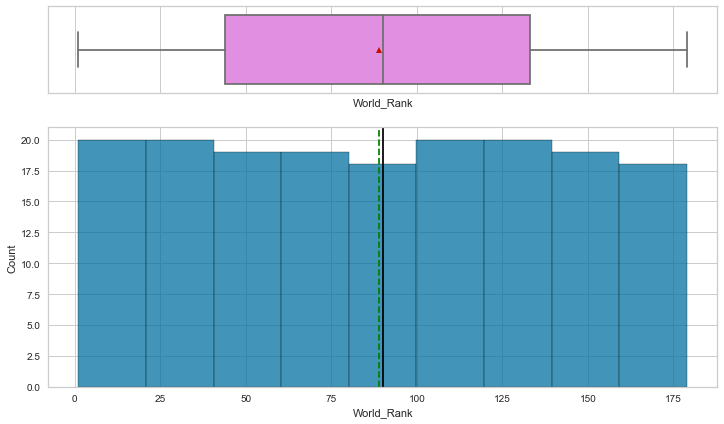

<IPython.core.display.Javascript object>

In [44]:
histogram_boxplot(fileData, "World_Rank")

### As shown above, the World_Rank has no outliers

## Observations on Region_Rank

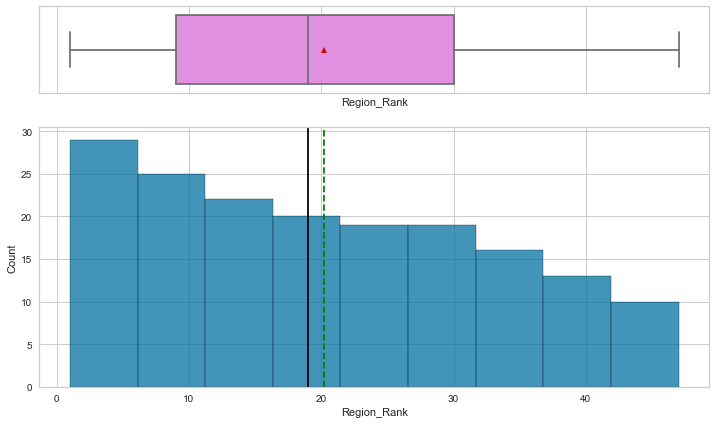

<IPython.core.display.Javascript object>

In [45]:
histogram_boxplot(fileData, "Region_Rank")

### As shown above, Region_Rank also doesn't have any outliers

## Observations on Judical_Effectiveness

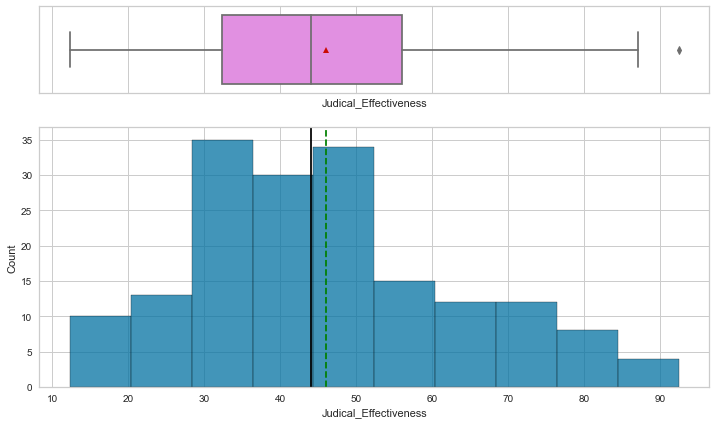

<IPython.core.display.Javascript object>

In [46]:
histogram_boxplot(fileData, "Judical_Effectiveness")

### As shown above, Judicial_Effectiveness has some outliers but let's ignore it considering the size of the dataset 

## Observations on Government_Integrity

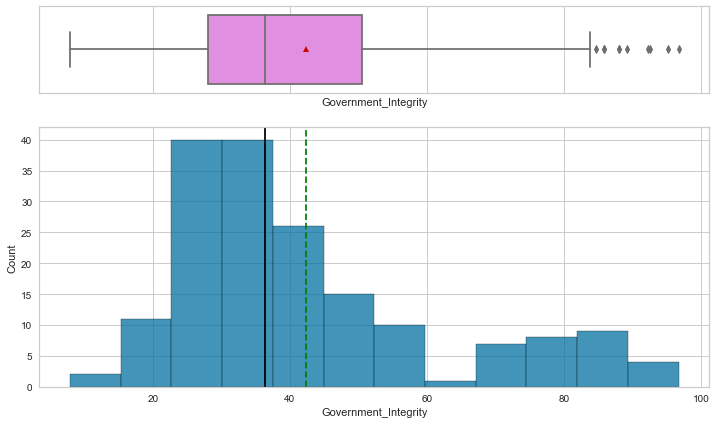

<IPython.core.display.Javascript object>

In [47]:
histogram_boxplot(fileData, "Government_Integrity")

### As shown above, Government_Integrity has some outliers which might need to be treated - let's hold on to it for now

## Observations on Tax_Burden

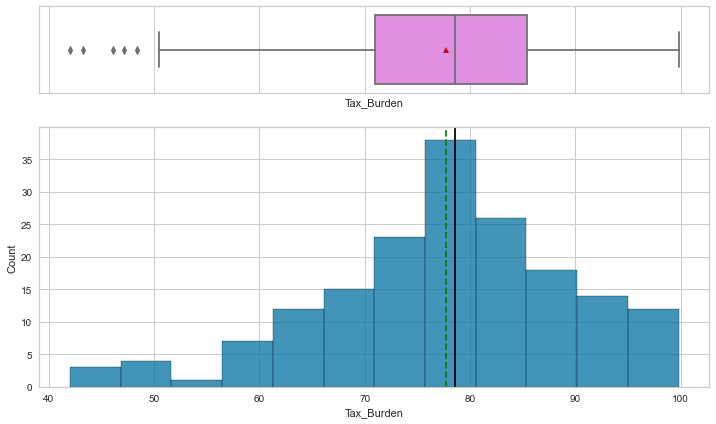

<IPython.core.display.Javascript object>

In [48]:
histogram_boxplot(fileData, "Tax_Burden")

## Observations on Investment_Freedom

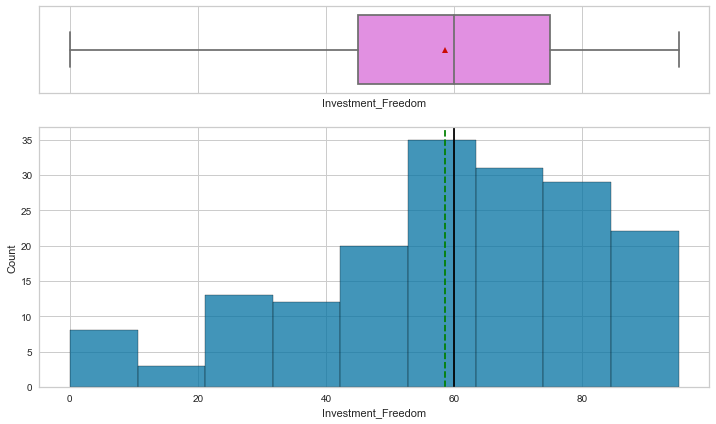

<IPython.core.display.Javascript object>

In [49]:
histogram_boxplot(fileData, "Investment_Freedom")

## Observations on Financial_Freedom

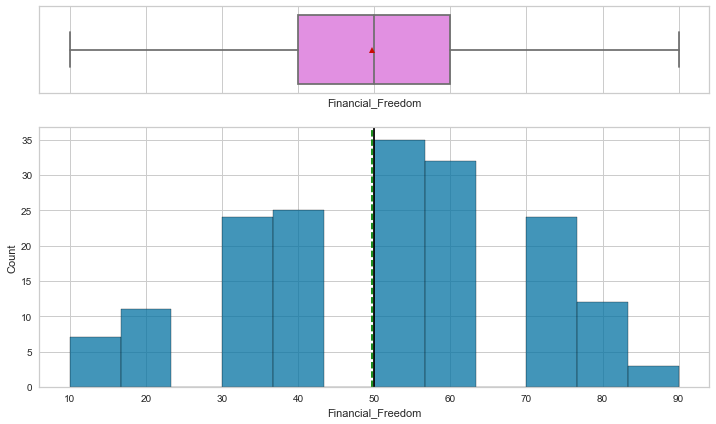

<IPython.core.display.Javascript object>

In [50]:
histogram_boxplot(fileData, "Financial_Freedom")

## Observations on Tariff_Rate

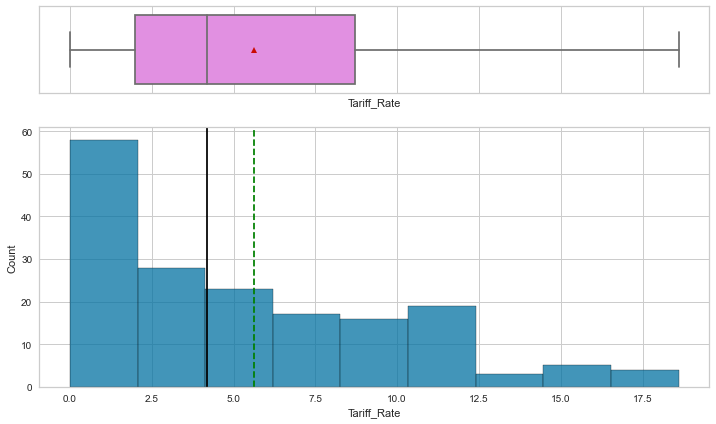

<IPython.core.display.Javascript object>

In [51]:
histogram_boxplot(fileData, "Tariff_Rate")

## Observations on Income_Tax_Rate

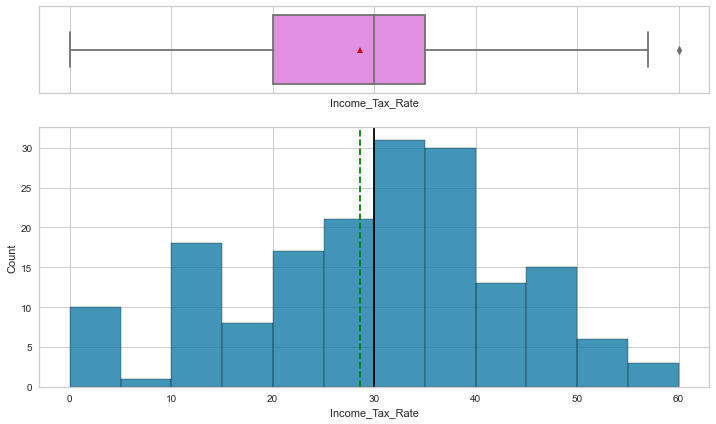

<IPython.core.display.Javascript object>

In [52]:
histogram_boxplot(fileData, "Income_Tax_Rate")

## Observations on Inflation

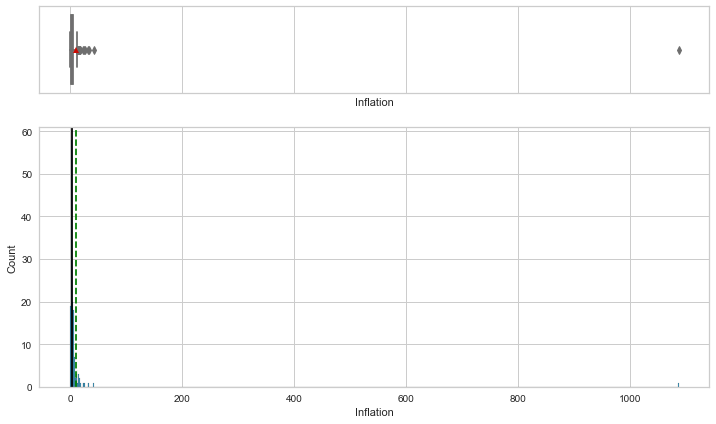

<IPython.core.display.Javascript object>

In [53]:
histogram_boxplot(fileData, "Inflation")

# Exploratory Data Analysis - Bivariate 

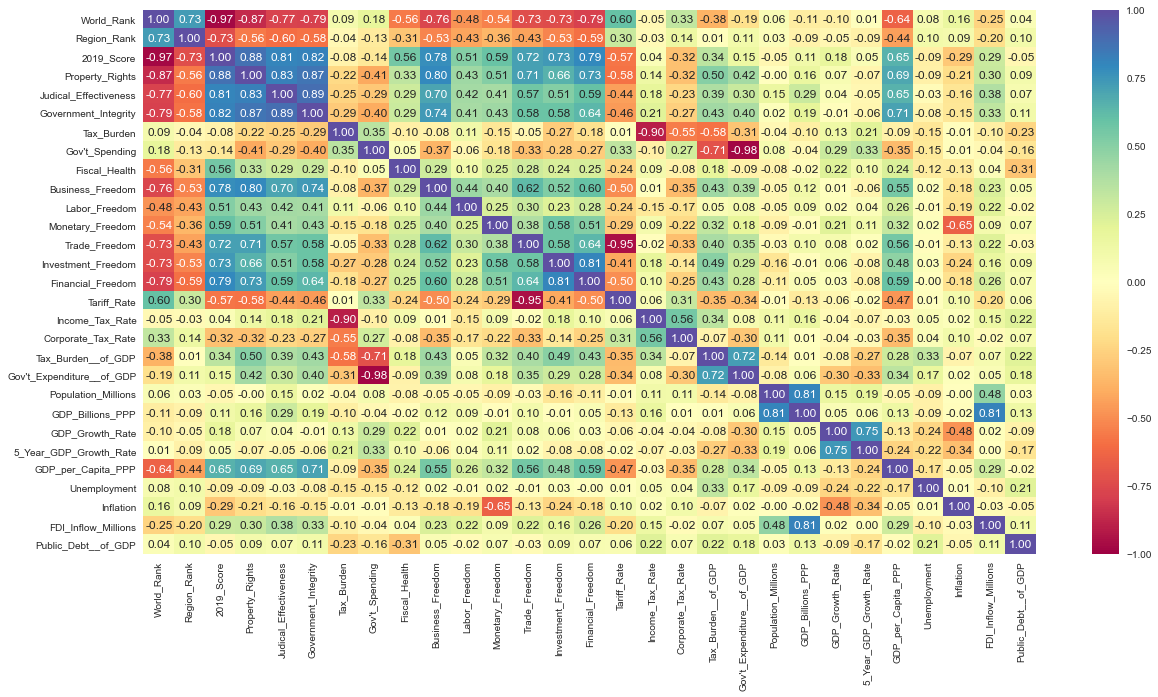

<IPython.core.display.Javascript object>

In [54]:
plt.figure(figsize=(20, 10))
sns.heatmap(fileData.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

As shown above, 
* Judicial_Effectiveness and Government_Integrity seem to be highly correlated
* Government_Integrity and Property_Rights are also highly correlated
* Property_Rights seems to be correlated with 2019_Score
* GDP_Growth_Rate seems to be correlated with the 5_Year_GDP_Growth_Rate
* Gov't_Expenditure__of_GDP seems to be correlated with the Tax_Burden__of_GDP

In [55]:
fileData.head()

Region  World_Rank  Region_Rank  2019_Score  \
0                  Asia-Pacific       152.0         39.0        51.5   
1                        Europe        52.0         27.0        66.5   
2  Middle East and North Africa       171.0         14.0        46.2   
3            Sub-Saharan Africa       156.0         33.0        50.6   
4                      Americas       148.0         26.0        52.2   

   Property_Rights  Judical_Effectiveness  Government_Integrity  Tax_Burden  \
0             19.6                   29.6                  25.2        91.7   
1             54.8                   30.6                  40.4        86.3   
2             31.6                   36.2                  28.9        76.4   
3             35.9                   26.6                  20.5        83.9   
4             47.8                   44.5                  33.5        69.3   

   Gov't_Spending  Fiscal_Health  Business_Freedom  Labor_Freedom  \
0            80.3           99.3              49.2           60.4   
1            73.9           80.6              69.3           52.7   
2            48.7           18.7              61.6           49.9   
3            80.7           58.2              55.7           58.8   
4            49.5           33.0              56.4           46.9   

   Monetary_Freedom  Trade_Freedom  Investment_Freedom  Financial_Freedom  \
0              76.7           66.0                10.0               10.0   
1              81.5           87.8                70.0               70.0   
2              74.9           67.4                30.0               30.0   
3              55.4           61.2                30.0               40.0   
4              60.2           70.0                55.0               60.0   

   Tariff_Rate  Income_Tax_Rate  Corporate_Tax_Rate  Tax_Burden__of_GDP  \
0          7.0             20.0                20.0                 5.0   
1          1.1             23.0                15.0                24.9   
2          8.8             35.0                23.0                24.5   
3          9.4             17.0                30.0                20.6   
4          7.5             35.0                30.0                30.8   

   Gov't_Expenditure__of_GDP  Population_Millions  GDP_Billions_PPP  \
0                       25.6                 35.5              69.6   
1                       29.5                  2.9              36.0   
2                       41.4                 41.5             632.9   
3                       25.3                 28.2             190.3   
4                       41.0                 44.1             920.2   

   GDP_Growth_Rate  5_Year_GDP_Growth_Rate  GDP_per_Capita_PPP  Unemployment  \
0              2.5                     2.9              1958.0           8.8   
1              3.9                     2.5             12507.0          13.9   
2              2.0                     3.1             15237.0          10.0   
3              0.7                     2.9              6753.0           8.2   
4              2.9                     0.7             20876.0           8.7   

   Inflation  FDI_Inflow_Millions  Public_Debt__of_GDP  
0        5.0                 53.9                  7.3  
1        2.0               1119.1                 71.2  
2        5.6               1203.0                 25.8  
3       31.7              -2254.5                 65.3  
4       25.7              11857.0                 52.6

<IPython.core.display.Javascript object>

## Investment_Freedom vs Financial_Freedom and Region

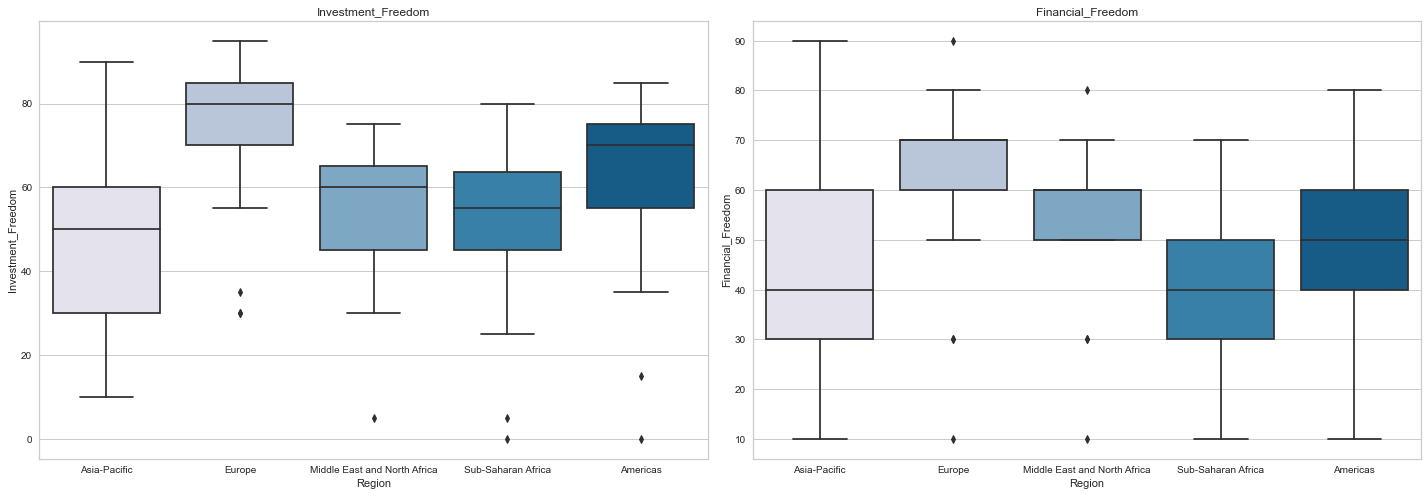

<IPython.core.display.Javascript object>

In [56]:
cols = fileData[["Investment_Freedom", "Financial_Freedom"]].columns.tolist()
plt.figure(figsize=(20, 20))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(fileData["Region"], fileData[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

### On an average, Investment_Freedom and Financial_Freedom are more better in Europe region compared to Americas

## Region vs Judical_Effectiveness and Government_Integrity

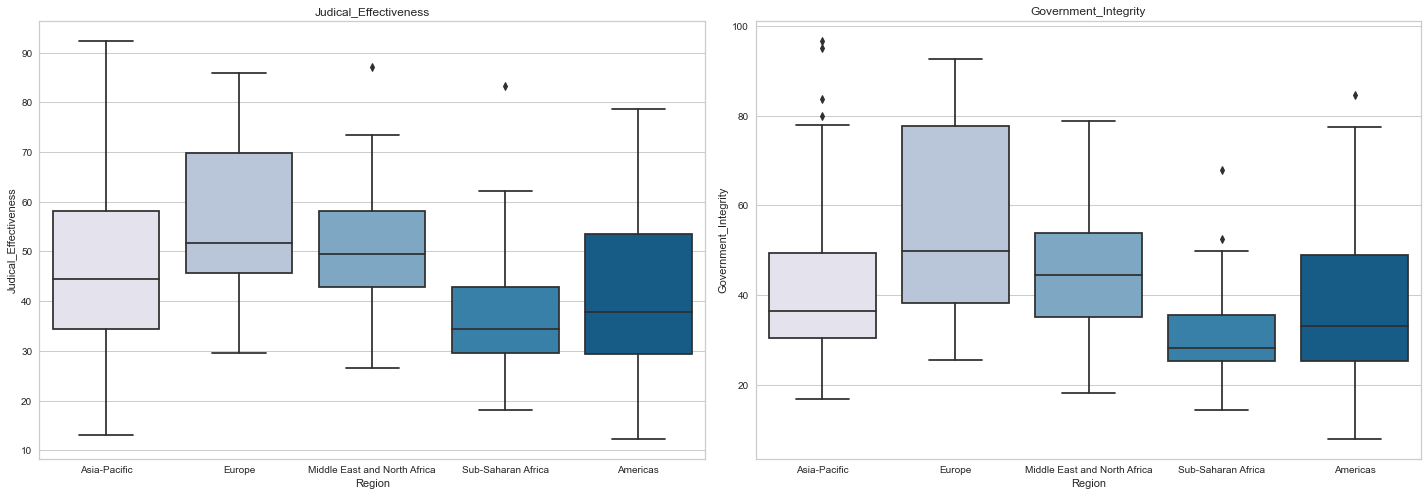

<IPython.core.display.Javascript object>

In [57]:
cols = fileData[["Judical_Effectiveness", "Government_Integrity"]].columns.tolist()
plt.figure(figsize=(20, 20))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(fileData["Region"], fileData[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

### On an average, Judicial_Effectiveness and Government_Integrity is better in Europe region compared to others. There are some outliers in African countries 

## Region vs Gov't_Spending and Tax_Burden

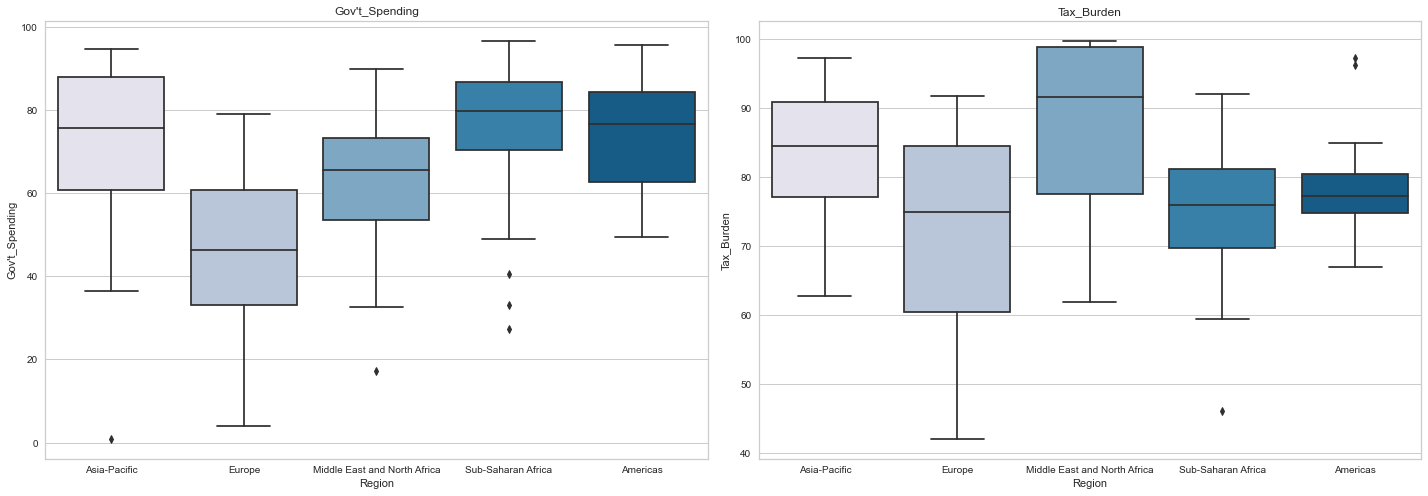

<IPython.core.display.Javascript object>

In [58]:
cols = fileData[["Gov't_Spending", "Tax_Burden"]].columns.tolist()
plt.figure(figsize=(20, 20))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(fileData["Region"], fileData[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

### As shown above
* Gov't_Spending is more in Sub-Saharan Africa country 
* Tax_Burden in Sub Saharan Africa Country is on par with other countries. 
* Tax_Burden is also higher in Middle East and North Africa countries 

## Region vs Income_Tax_Rate and Corporate_Tax_Rate

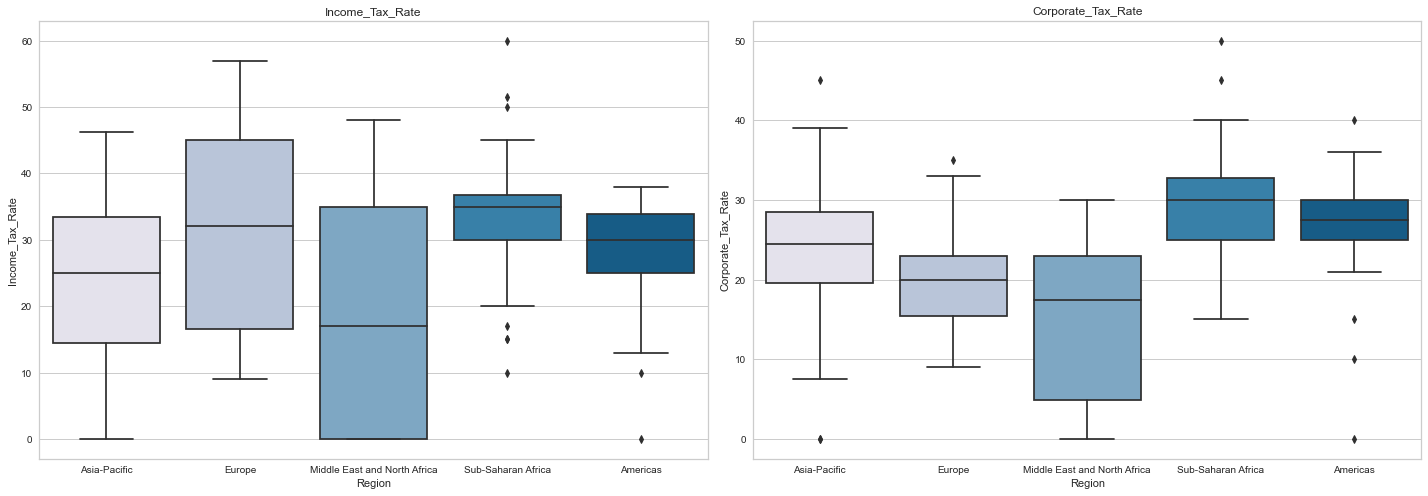

<IPython.core.display.Javascript object>

In [59]:
cols = fileData[["Income_Tax_Rate", "Corporate_Tax_Rate"]].columns.tolist()
plt.figure(figsize=(20, 20))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(fileData["Region"], fileData[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

### As shown above, Income_Tax_Rate is higher in Sub-Saharan Africa while the Corporate_tax_rate is also similarly high in the same region

## CDF Plot of Numerical Variables

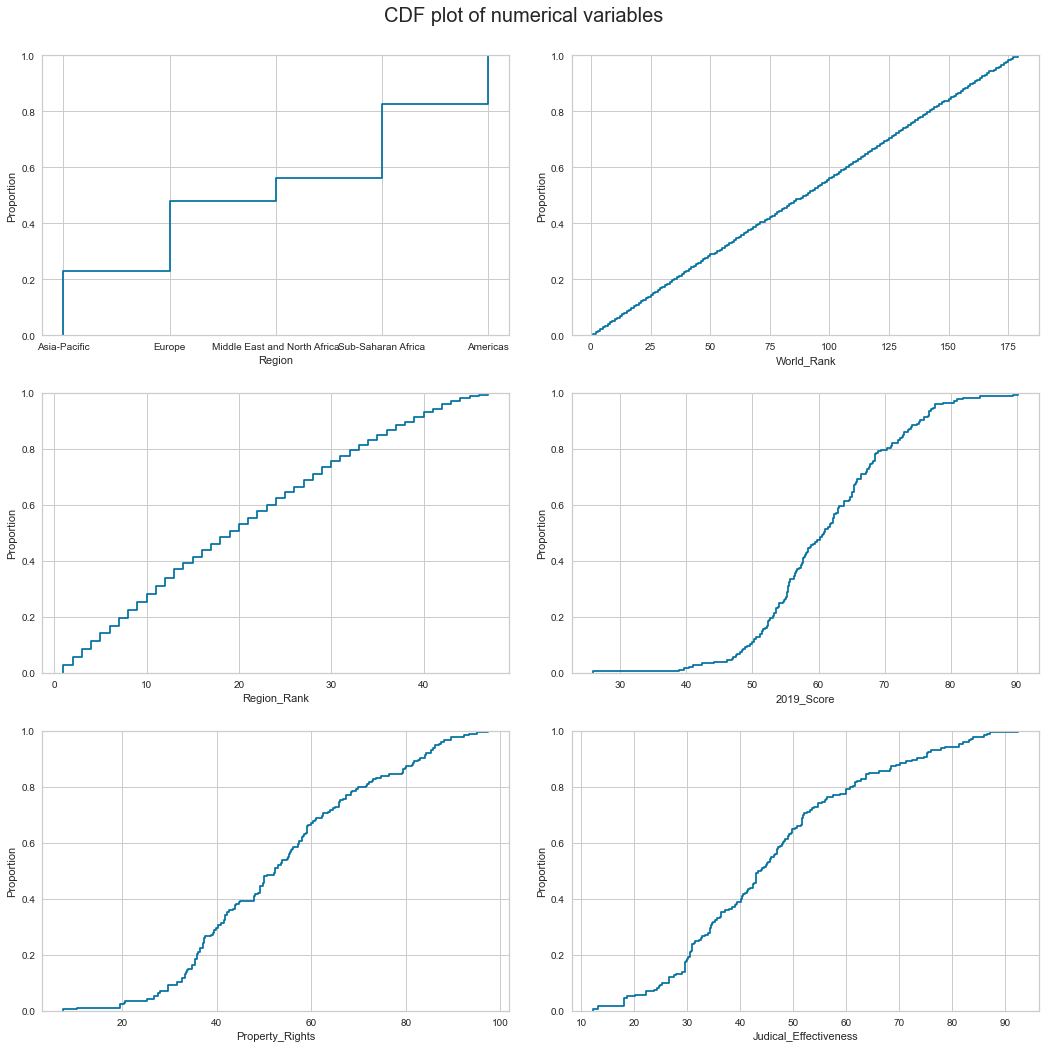

<IPython.core.display.Javascript object>

In [60]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)

counter = 0

for ii in range(3):
    sns.ecdfplot(data=fileData, ax=axes[ii][0], x=fileData.columns.tolist()[counter])
    counter = counter + 1
    if counter != 4:
        sns.ecdfplot(
            data=fileData, ax=axes[ii][1], x=fileData.columns.tolist()[counter]
        )
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

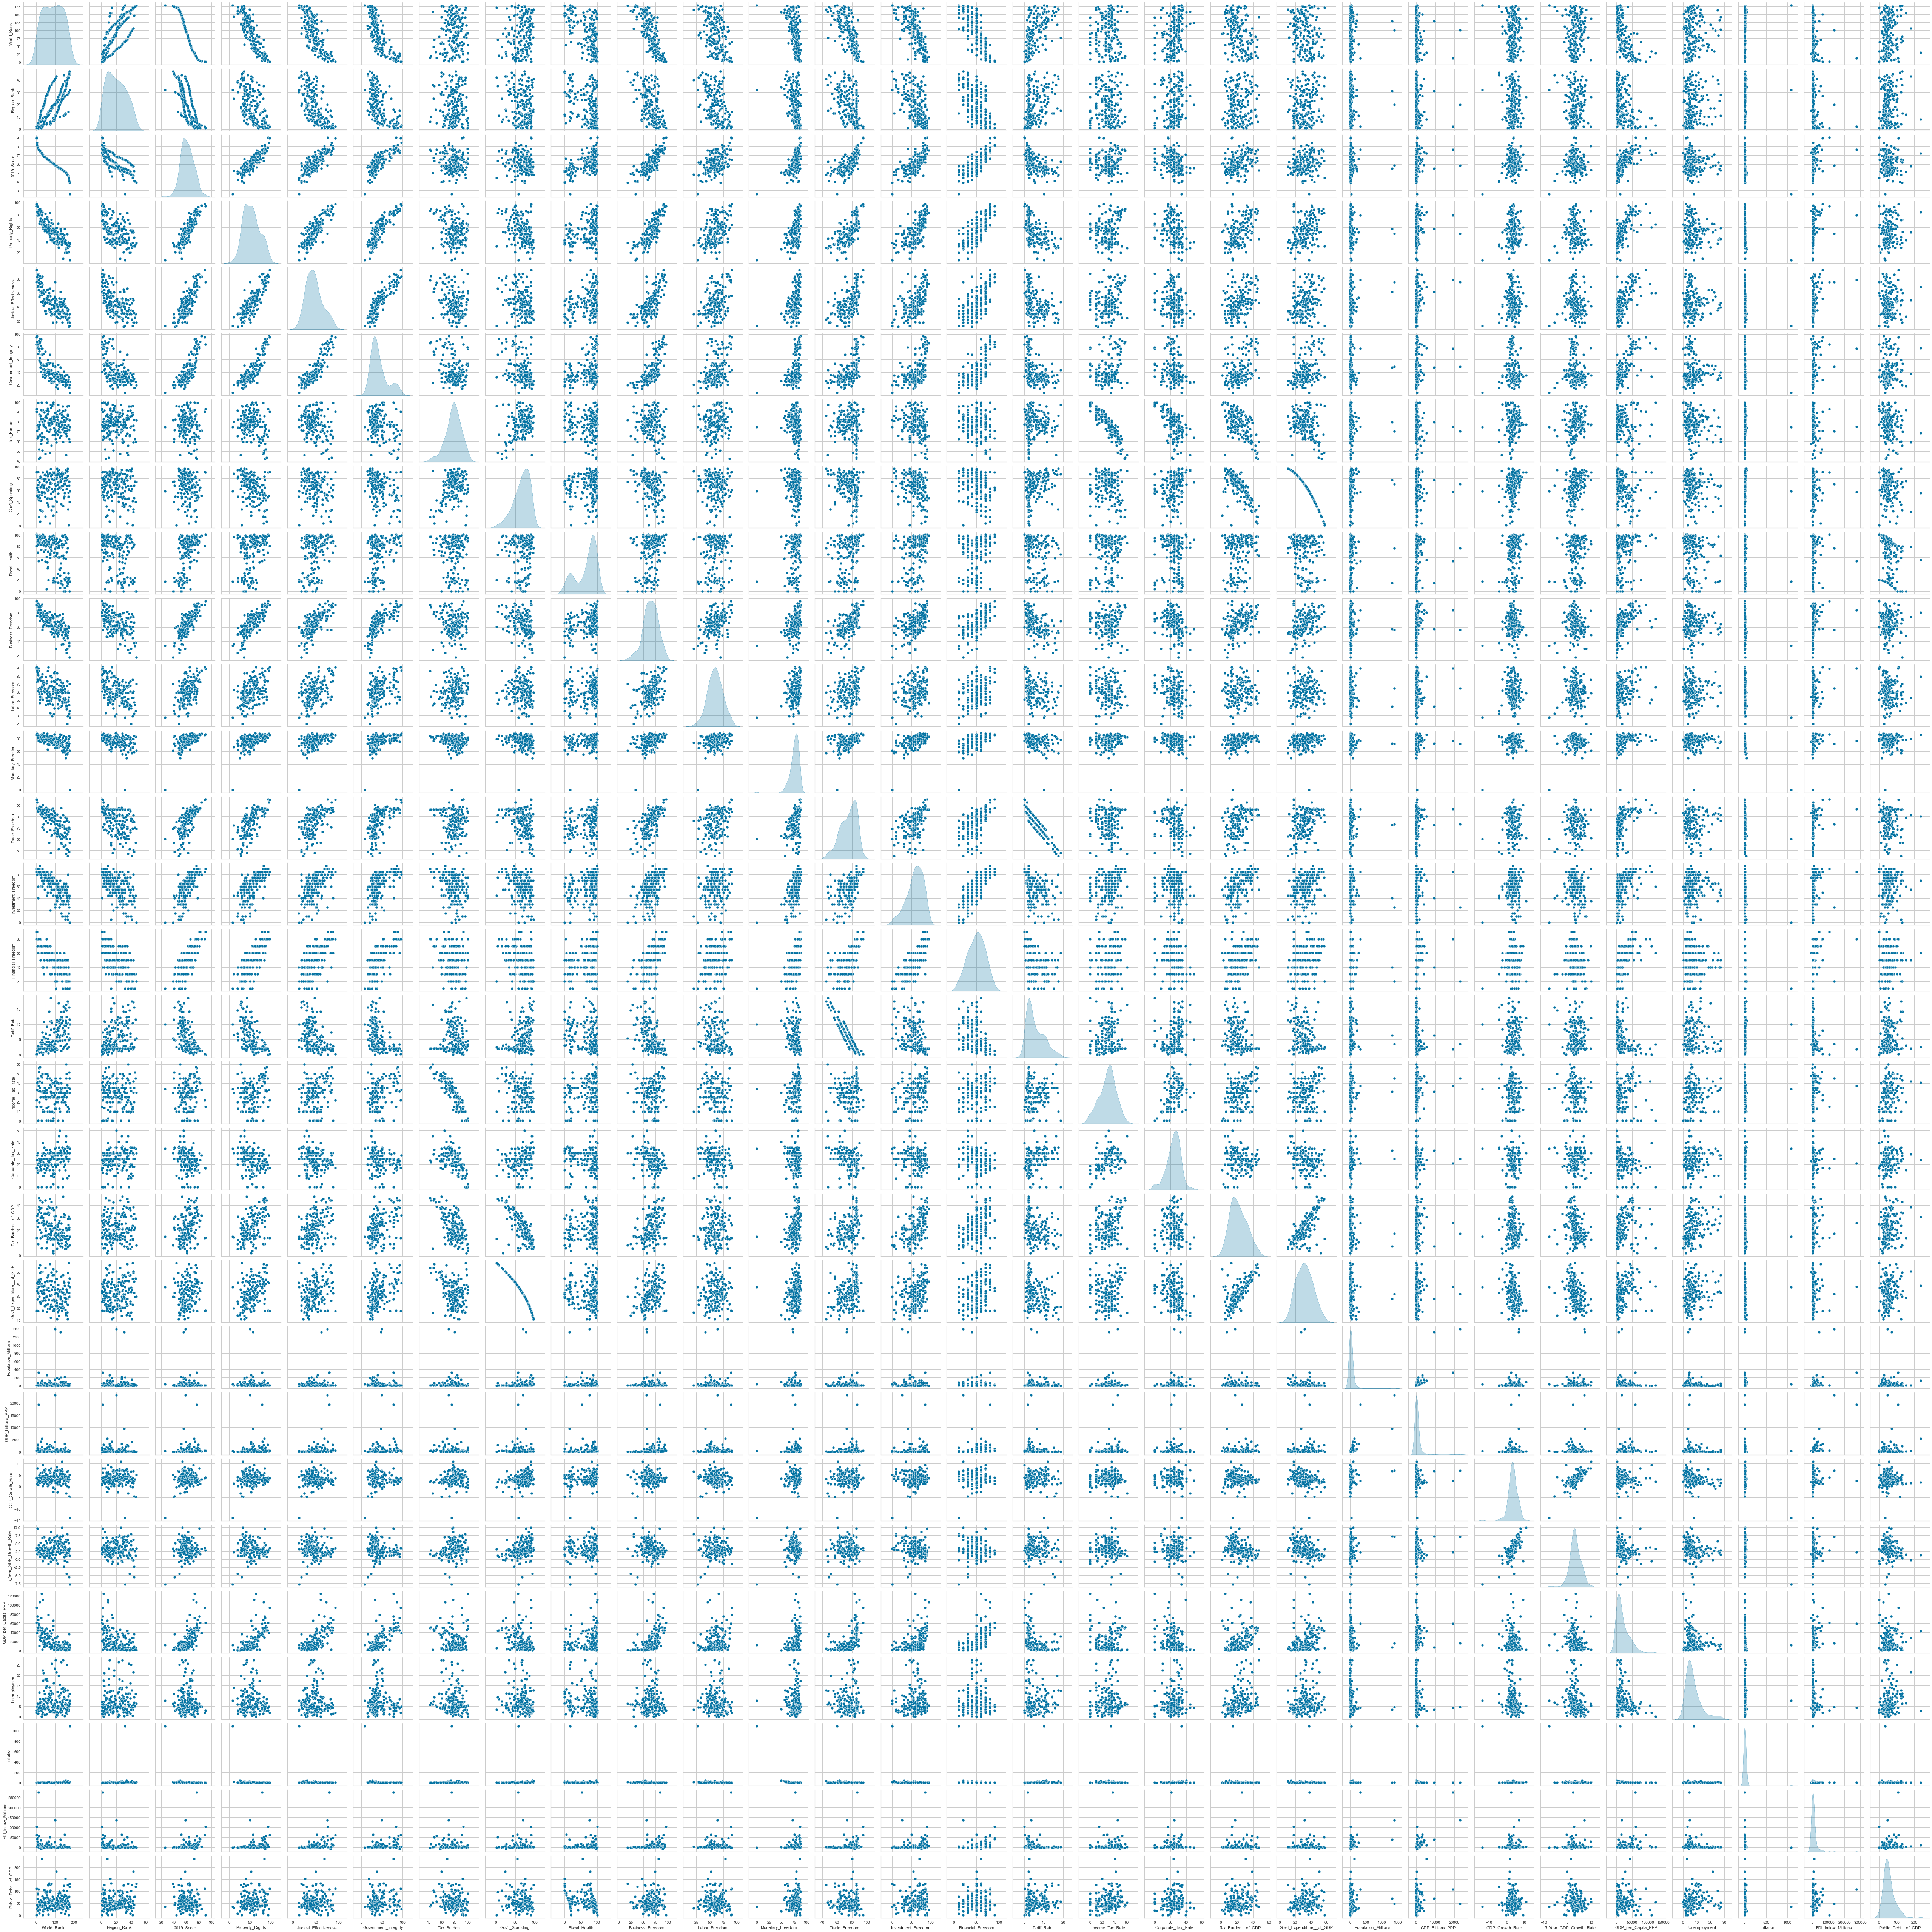

<IPython.core.display.Javascript object>

In [61]:
sns.pairplot(data=fileData, diag_kind="kde")
plt.show()

### As shown above, the number of variables are huge so this bivariate analysis might not throw more information except that there are patterns in the correlation between them (as seen in the grouping of the dots)

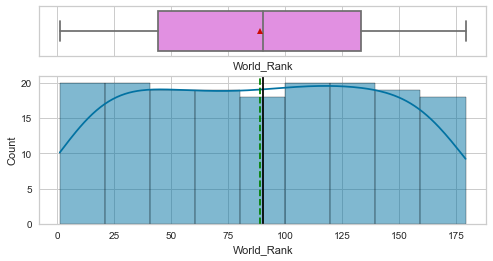

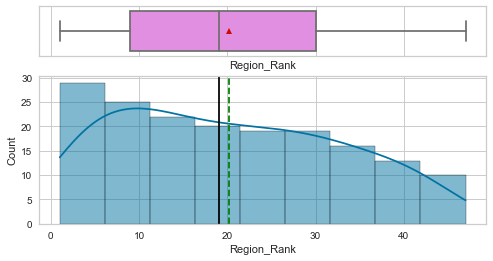

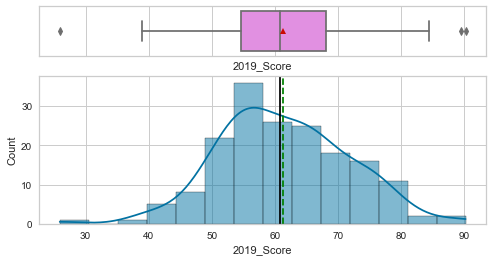

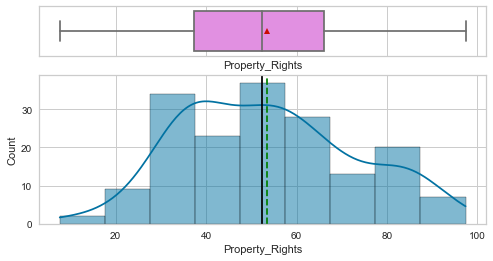

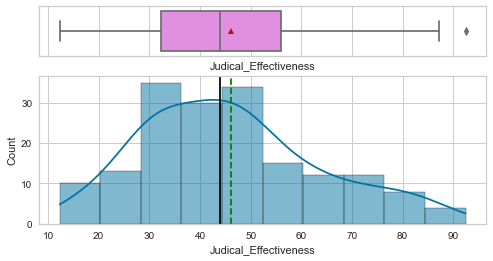

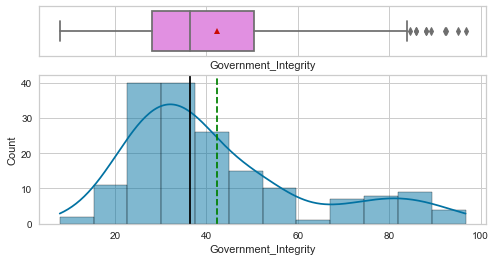

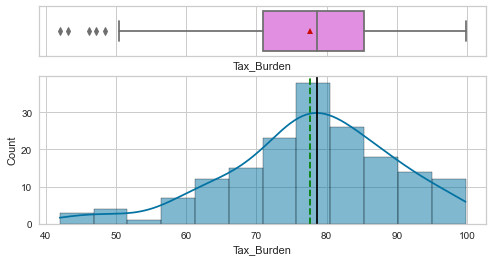

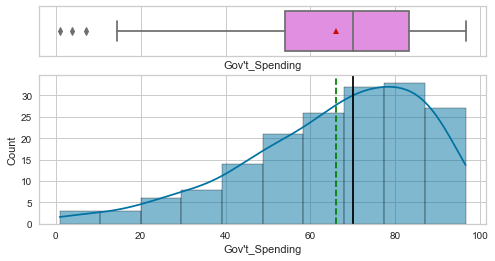

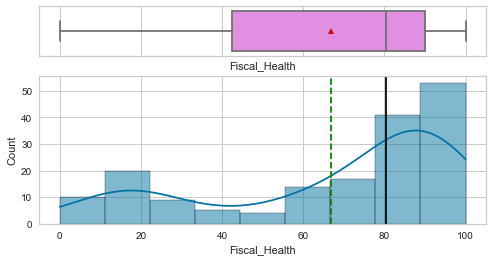

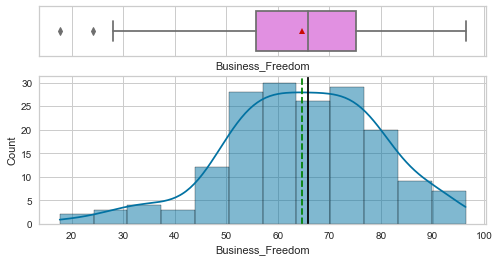

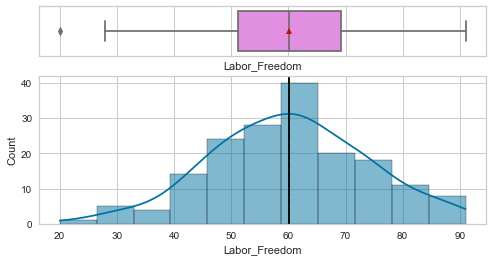

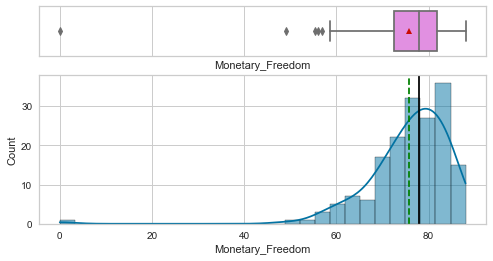

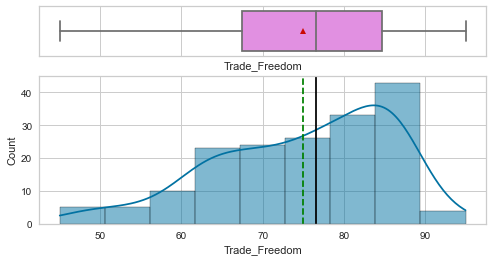

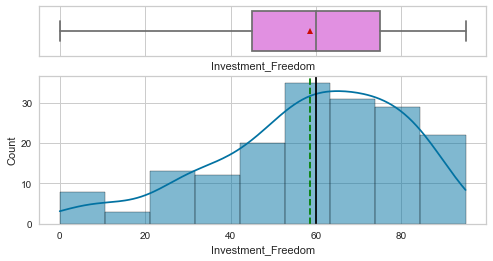

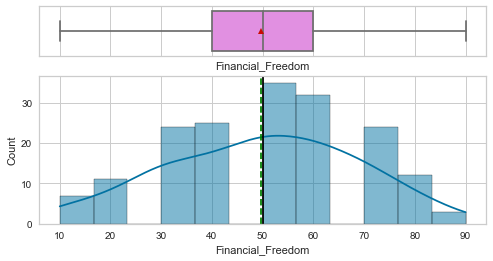

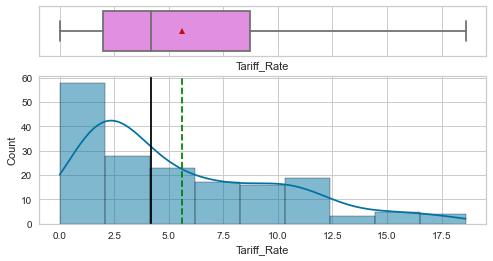

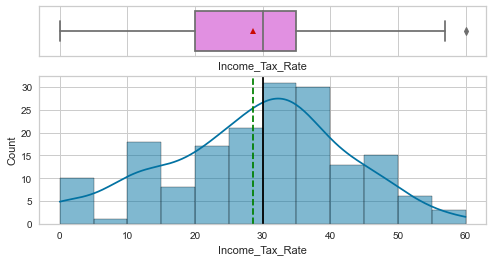

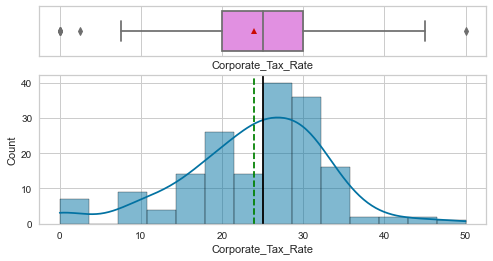

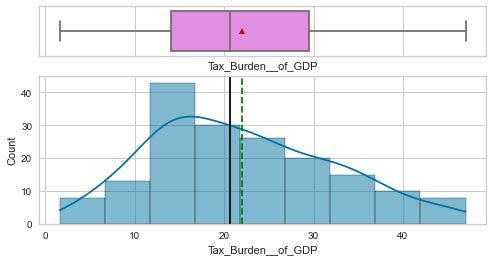

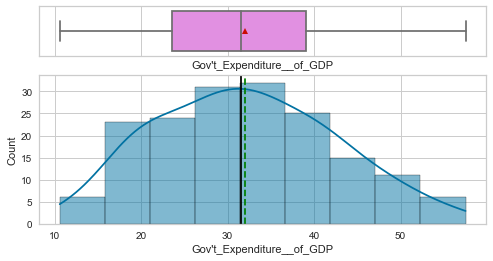

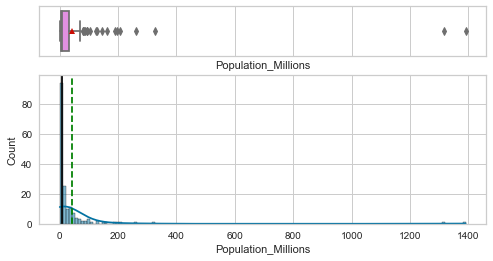

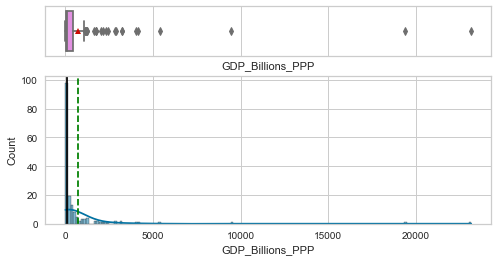

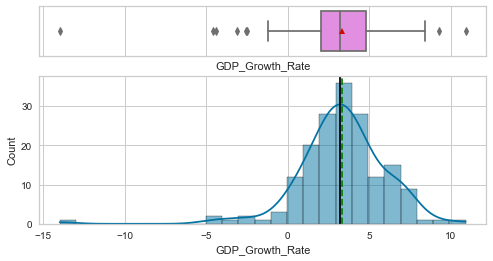

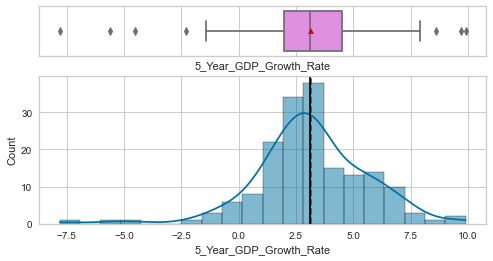

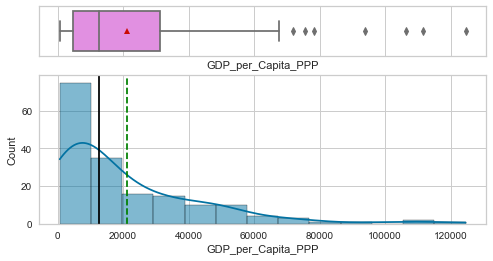

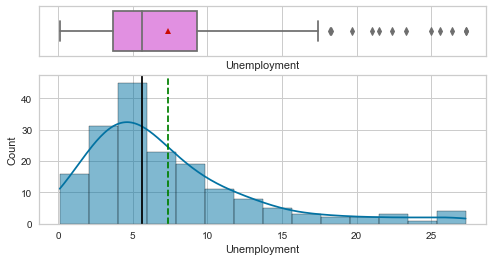

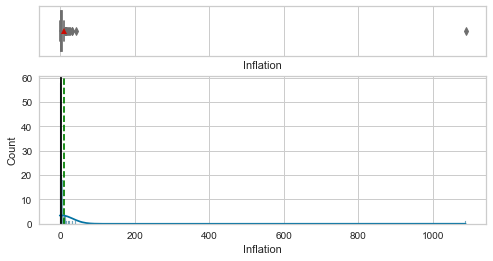

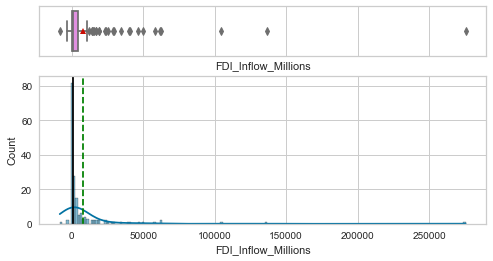

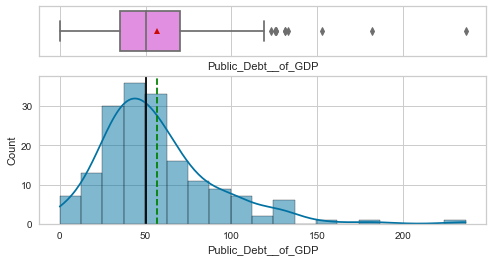

<IPython.core.display.Javascript object>

In [62]:
# selecting numerical columns
num_col = fileData.select_dtypes(include=np.number).columns.tolist()
num_col
for item in num_col:
    histogram_boxplot(fileData, item, kde=True, figsize=(8, 4))

## Scaling
* Let's scale the data before we proceed to clustering

In [64]:
# scaling the data before clustering
scaler = StandardScaler()
subset = fileData[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [65]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

## K-Means Clustering

In [128]:
k_means_df = subset_scaled_df.copy()

<IPython.core.display.Javascript object>

Number of Clusters: 1 	Average Distortion: 4.989667070468482
Number of Clusters: 2 	Average Distortion: 4.312654101858305
Number of Clusters: 3 	Average Distortion: 4.063902315663825
Number of Clusters: 4 	Average Distortion: 3.96065169561391
Number of Clusters: 5 	Average Distortion: 3.8543356816864103
Number of Clusters: 6 	Average Distortion: 3.710404646141183
Number of Clusters: 7 	Average Distortion: 3.614745383074388
Number of Clusters: 8 	Average Distortion: 3.4952357004068597


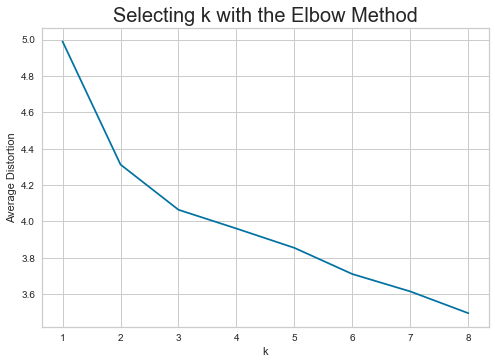

<IPython.core.display.Javascript object>

In [129]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

### The appropriate value for K from the elbow curve seems to be 2 or 3

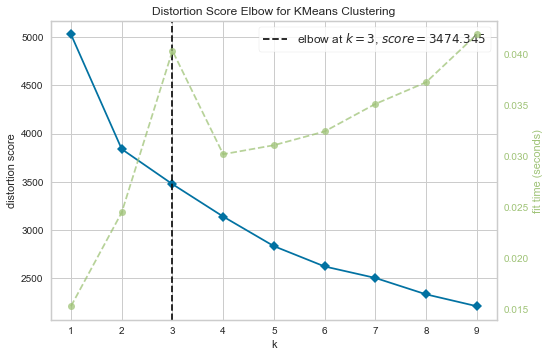

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<IPython.core.display.Javascript object>

In [130]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 10), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Let's check the Silhouette scores

In [131]:
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.21952753216989085)
For n_clusters = 3, the silhouette score is 0.15532415923722515)
For n_clusters = 4, the silhouette score is 0.1604194523328919)
For n_clusters = 5, the silhouette score is 0.1824163905351679)
For n_clusters = 6, the silhouette score is 0.1444894731721627)
For n_clusters = 7, the silhouette score is 0.13233972272654354)
For n_clusters = 8, the silhouette score is 0.13087685560352239)
For n_clusters = 9, the silhouette score is 0.1373536702115819)


<IPython.core.display.Javascript object>

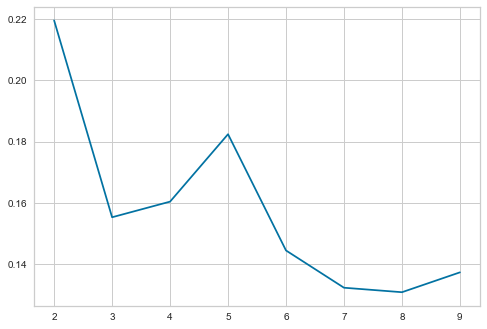

<IPython.core.display.Javascript object>

In [132]:
plt.plot(cluster_list, sil_score)
plt.show()

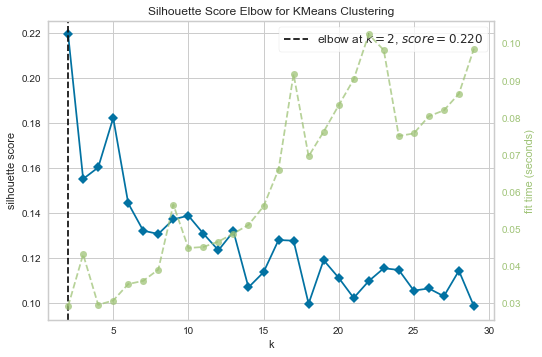

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

<IPython.core.display.Javascript object>

In [133]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 30), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### From the silhouette scores, it seems that 2 is a good value for k.

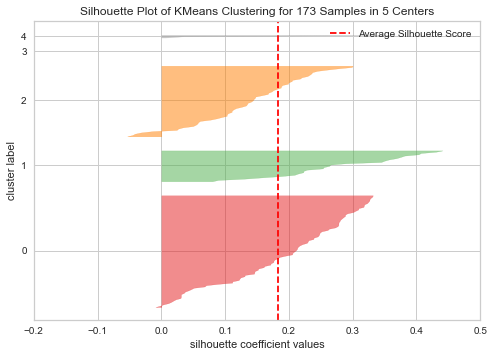

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 173 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [134]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

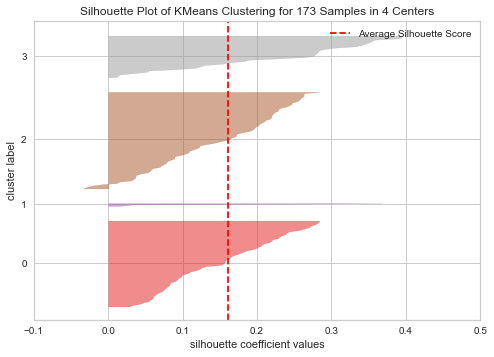

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 173 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [135]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

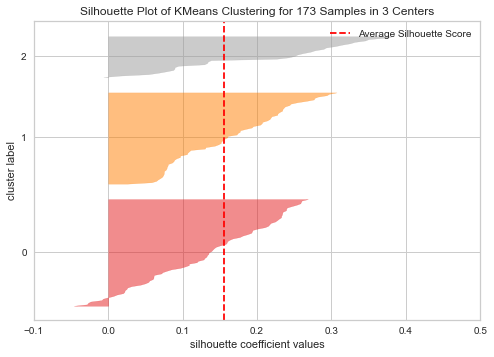

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 173 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [136]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

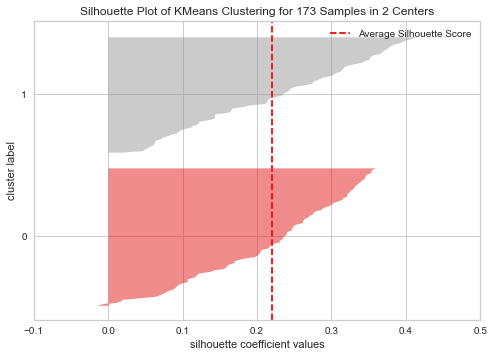

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 173 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [137]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

### Observations
* Silhouette coefficients for 2 clusters is higher
* We will proceed with 2 clusters

In [138]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(k_means_df)

KMeans(n_clusters=2, random_state=0)

<IPython.core.display.Javascript object>

In [139]:
# creating a copy of the original data
df1 = fileData.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["K_means_segments"] = kmeans.labels_
df1["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

## Hierarchical Clustering

In [140]:
hc_df = subset_scaled_df.copy()

<IPython.core.display.Javascript object>

In [141]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7703465728199007.
Cophenetic correlation for Euclidean distance and complete linkage is 0.6494929086629848.
Cophenetic correlation for Euclidean distance and average linkage is 0.8531172619255687.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.7835528445880954.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7482508063289327.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7028748507565732.
Cophenetic correlation for Chebyshev distance and average linkage is 0.7874486687564849.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.7919914171687084.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7511136728582885.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5188676391583102.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7427551027734193.
Cophenetic co

<IPython.core.display.Javascript object>

In [142]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8531172619255687, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

### Let's explore different linkage methods with Euclidean distance only

In [143]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7703465728199007.
Cophenetic correlation for complete linkage is 0.6494929086629848.
Cophenetic correlation for average linkage is 0.8531172619255687.
Cophenetic correlation for centroid linkage is 0.8418921058630844.
Cophenetic correlation for ward linkage is 0.40076651864247.
Cophenetic correlation for weighted linkage is 0.7835528445880954.


<IPython.core.display.Javascript object>

In [144]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print()
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)


Highest cophenetic correlation is 0.8531172619255687, which is obtained with average linkage.


<IPython.core.display.Javascript object>

### We see that the cophenetic correlation is maximum with Euclidean distance and average linkage

### Let's view the dendrograms for the different linkage methods

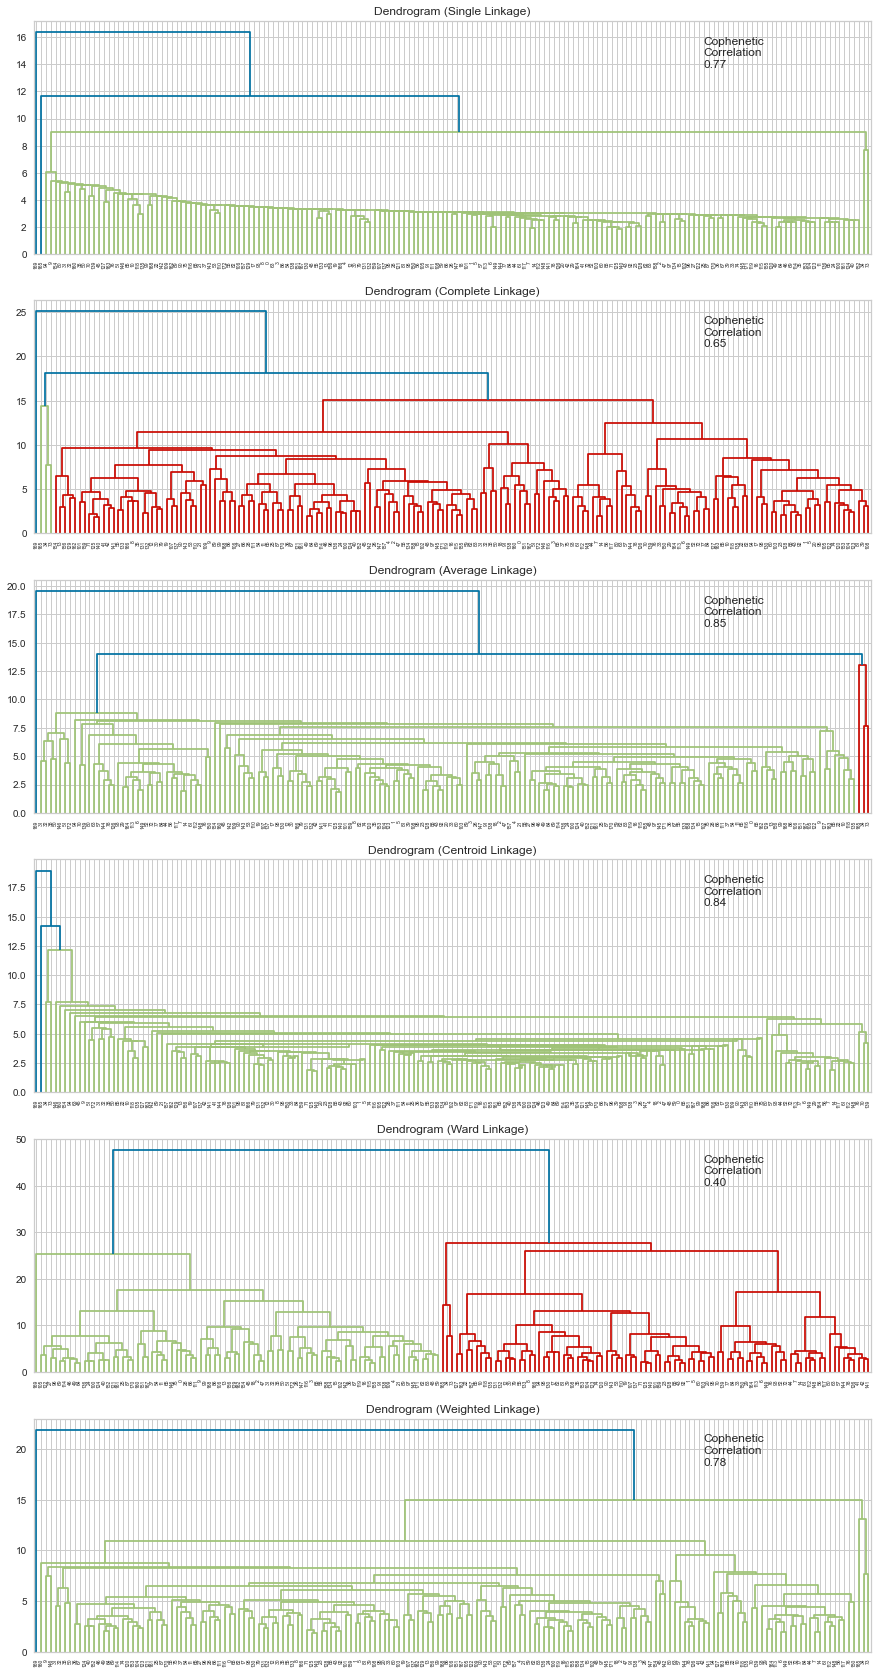

<IPython.core.display.Javascript object>

In [145]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [84]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

Linkage  Cophenetic Coefficient
4      ward                0.400874
1  complete                0.647725
0    single                0.767121
5  weighted                0.781584
3  centroid                0.840016
2   average                0.851333

<IPython.core.display.Javascript object>

### Let's move ahead with 2 clusters, Euclidean distance, and average linkage

In [146]:
HCmodel = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="average")
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average')

<IPython.core.display.Javascript object>

In [147]:
# creating a copy of the original data
df2 = fileData.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

<IPython.core.display.Javascript object>

In [148]:
hc_df.head()

World_Rank  Region_Rank  2019_Score  Property_Rights  \
0    1.222709     1.492075   -0.959866        -1.771283   
1   -0.719525     0.538690    0.501988         0.064576   
2    1.591733    -0.494144   -1.476388        -1.145422   
3    1.300398     1.015383   -1.047577        -0.921155   
4    1.145020     0.459241   -0.891646        -0.300510   

   Judical_Effectiveness  Government_Integrity  Tax_Burden  Gov't_Spending  \
0              -0.934381             -0.859921    1.190865        0.683410   
1              -0.877563             -0.094849    0.731399        0.377140   
2              -0.559381             -0.673687   -0.110957       -0.828800   
3              -1.104836             -1.096490    0.527191        0.702552   
4              -0.087789             -0.442151   -0.715070       -0.790516   

   Fiscal_Health  Business_Freedom  Labor_Freedom  Monetary_Freedom  \
0       1.057424         -1.053944       0.025371          0.107381   
1       0.448782          0.310799      -0.535102          0.614025   
2      -1.565920         -0.212013      -0.738910         -0.082610   
3      -0.280286         -0.612610      -0.091091         -2.140851   
4      -1.100488         -0.565081      -0.957276         -1.634207   

   Trade_Freedom  Investment_Freedom  Financial_Freedom  Tariff_Rate  \
0      -0.835841           -2.276011          -2.101765     0.313119   
1       1.183693            0.534815           1.078456    -1.029175   
2      -0.706146           -1.339069          -1.041691     0.722632   
3      -1.280509           -1.339069          -0.511654     0.859136   
4      -0.465284           -0.167891           0.548420     0.426872   

   Income_Tax_Rate  Corporate_Tax_Rate  Tax_Burden__of_GDP  \
0        -0.651980           -0.442440           -1.683992   
1        -0.424652           -1.007244            0.281988   
2         0.484660           -0.103558            0.242471   
3        -0.879308            0.687167           -0.142822   
4         0.484660            0.687167            0.864867   

   Gov't_Expenditure__of_GDP  Population_Millions  GDP_Billions_PPP  \
0                  -0.620165            -0.044102         -0.265930   
1                  -0.243612            -0.262209         -0.279483   
2                   0.905356            -0.003960         -0.038708   
3                  -0.649130            -0.092942         -0.217242   
4                   0.866735             0.013435          0.077183   

   GDP_Growth_Rate  5_Year_GDP_Growth_Rate  GDP_per_Capita_PPP  Unemployment  \
0        -0.288490               -0.110439           -0.852011      0.259212   
1         0.222272               -0.273044           -0.386777      1.159969   
2        -0.470905               -0.029137           -0.266378      0.471155   
3        -0.945184               -0.110439           -0.640541      0.153240   
4        -0.142558               -1.004764           -0.017685      0.241550   

   Inflation  FDI_Inflow_Millions  Public_Debt__of_GDP  HC_Clusters  \
0  -0.071310            -0.312060            -1.462449            2   
1  -0.107754            -0.271768             0.430524            2   
2  -0.064021            -0.268594            -0.914405            2   
3   0.253049            -0.399377             0.255742            2   
4   0.180159             0.134403            -0.120482            2   

   HC_segments  
0            0  
1            0  
2            0  
3            0  
4            0

<IPython.core.display.Javascript object>

In [149]:
df2.head()

Region  World_Rank  Region_Rank  2019_Score  \
0                  Asia-Pacific       152.0         39.0        51.5   
1                        Europe        52.0         27.0        66.5   
2  Middle East and North Africa       171.0         14.0        46.2   
3            Sub-Saharan Africa       156.0         33.0        50.6   
4                      Americas       148.0         26.0        52.2   

   Property_Rights  Judical_Effectiveness  Government_Integrity  Tax_Burden  \
0             19.6                   29.6                  25.2        91.7   
1             54.8                   30.6                  40.4        86.3   
2             31.6                   36.2                  28.9        76.4   
3             35.9                   26.6                  20.5        83.9   
4             47.8                   44.5                  33.5        69.3   

   Gov't_Spending  Fiscal_Health  Business_Freedom  Labor_Freedom  \
0            80.3           99.3              49.2           60.4   
1            73.9           80.6              69.3           52.7   
2            48.7           18.7              61.6           49.9   
3            80.7           58.2              55.7           58.8   
4            49.5           33.0              56.4           46.9   

   Monetary_Freedom  Trade_Freedom  Investment_Freedom  Financial_Freedom  \
0              76.7           66.0                10.0               10.0   
1              81.5           87.8                70.0               70.0   
2              74.9           67.4                30.0               30.0   
3              55.4           61.2                30.0               40.0   
4              60.2           70.0                55.0               60.0   

   Tariff_Rate  Income_Tax_Rate  Corporate_Tax_Rate  Tax_Burden__of_GDP  \
0          7.0             20.0                20.0                 5.0   
1          1.1             23.0                15.0                24.9   
2          8.8             35.0                23.0                24.5   
3          9.4             17.0                30.0                20.6   
4          7.5             35.0                30.0                30.8   

   Gov't_Expenditure__of_GDP  Population_Millions  GDP_Billions_PPP  \
0                       25.6                 35.5              69.6   
1                       29.5                  2.9              36.0   
2                       41.4                 41.5             632.9   
3                       25.3                 28.2             190.3   
4                       41.0                 44.1             920.2   

   GDP_Growth_Rate  5_Year_GDP_Growth_Rate  GDP_per_Capita_PPP  Unemployment  \
0              2.5                     2.9              1958.0           8.8   
1              3.9                     2.5             12507.0          13.9   
2              2.0                     3.1             15237.0          10.0   
3              0.7                     2.9              6753.0           8.2   
4              2.9                     0.7             20876.0           8.7   

   Inflation  FDI_Inflow_Millions  Public_Debt__of_GDP  HC_Clusters  \
0        5.0                 53.9                  7.3            2   
1        2.0               1119.1                 71.2            2   
2        5.6               1203.0                 25.8            2   
3       31.7              -2254.5                 65.3            2   
4       25.7              11857.0                 52.6            2   

   HC_segments  
0            0  
1            0  
2            0  
3            0  
4            0

<IPython.core.display.Javascript object>

In [150]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
fileData["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling and Comparison

### Cluster Profiling: K-means Clustering

In [151]:
km_cluster_profile = df1.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [152]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("K_means_segments")["Region_Rank"].count().values
)

<IPython.core.display.Javascript object>

In [153]:
km_cluster_profile

World_Rank  Region_Rank  2019_Score  Property_Rights  \
K_means_segments                                                         
0                  42.303797    13.253165   70.069620        69.555696   
1                 128.329787    26.074468   54.020213        40.120213   

                  Judical_Effectiveness  Government_Integrity  Tax_Burden  \
K_means_segments                                                            
0                             59.013924             57.241772   75.825316   
1                             35.145745             29.713830   79.282979   

                  Gov't_Spending  Fiscal_Health  Business_Freedom  \
K_means_segments                                                    
0                      57.478481      78.581013         75.239241   
1                      73.196809      56.920213         55.884043   

                  Labor_Freedom  Monetary_Freedom  Trade_Freedom  \
K_means_segments                                                   
0                     65.415190         80.493671      83.163291   
1                     55.543617         71.639362      68.180851   

                  Investment_Freedom  Financial_Freedom  Tariff_Rate  \
K_means_segments                                                       
0                          74.493671          64.303797     2.911392   
1                          45.212766          37.340426     7.903191   

                  Income_Tax_Rate  Corporate_Tax_Rate  Tax_Burden__of_GDP  \
K_means_segments                                                            
0                       29.048101           20.894937           27.027848   
1                       28.230851           26.456383           17.858511   

                  Gov't_Expenditure__of_GDP  Population_Millions  \
K_means_segments                                                   
0                                 36.359494            21.867089   
1                                 28.378723            59.089362   

                  GDP_Billions_PPP  GDP_Growth_Rate  5_Year_GDP_Growth_Rate  \
K_means_segments                                                              
0                       861.143038         3.036709                 2.64557   
1                       617.684043         3.504255                 3.61383   

                  GDP_per_Capita_PPP  Unemployment  Inflation  \
K_means_segments                                                
0                       37201.227848      7.902532   2.327848   
1                        7893.872340      6.853191  18.048936   

                  FDI_Inflow_Millions  Public_Debt__of_GDP  HC_Clusters  \
K_means_segments                                                          
0                        13104.922785            60.107595     1.974684   
1                         4268.818085            53.775532     1.946809   

                  count_in_each_segment  
K_means_segments                         
0                                    79  
1                                    94

<IPython.core.display.Javascript object>

### Cluster Profiling: Hierarchical Clustering

In [154]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

<IPython.core.display.Javascript object>

In [155]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Region_Rank"].count().values
)

<IPython.core.display.Javascript object>

In [156]:
hc_cluster_profile

World_Rank  Region_Rank  2019_Score  Property_Rights  \
HC_segments                                                         
0             88.523256    20.151163   61.555233         53.82907   
1            179.000000    32.000000   25.900000          7.60000   

             Judical_Effectiveness  Government_Integrity  Tax_Burden  \
HC_segments                                                            
0                        46.236628             42.484302   77.721512   
1                        13.100000              7.900000   74.700000   

             Gov't_Spending  Fiscal_Health  Business_Freedom  Labor_Freedom  \
HC_segments                                                                   
0                 66.065116      67.097674         64.901744      60.237791   
1                 58.100000      17.600000         33.900000      28.000000   

             Monetary_Freedom  Trade_Freedom  Investment_Freedom  \
HC_segments                                                        
0                   76.122674      75.109884           58.924419   
1                    0.000000      60.000000            0.000000   

             Financial_Freedom  Tariff_Rate  Income_Tax_Rate  \
HC_segments                                                    
0                    49.883721     5.598256        28.572674   
1                    10.000000    10.000000        34.000000   

             Corporate_Tax_Rate  Tax_Burden__of_GDP  \
HC_segments                                           
0                      23.85814           22.087209   
1                      34.00000           14.900000   

             Gov't_Expenditure__of_GDP  Population_Millions  GDP_Billions_PPP  \
HC_segments                                                                     
0                             31.99186             42.15407         730.88314   
1                             37.40000             31.40000         380.70000   

             GDP_Growth_Rate  5_Year_GDP_Growth_Rate  GDP_per_Capita_PPP  \
HC_segments                                                                
0                   3.391279                3.235465        21330.273256   
1                 -14.000000               -7.800000        12114.000000   

             Unemployment    Inflation  FDI_Inflow_Millions  \
HC_segments                                                   
0                7.330233     4.610465          8352.475581   
1                7.700000  1087.500000           -68.000000   

             Public_Debt__of_GDP  HC_Clusters  count_in_each_segment  
HC_segments                                                           
0                      56.793605     1.965116                    172  
1                      34.900000     1.000000                      1

<IPython.core.display.Javascript object>

## K-Means Clustering vs Hierarchical Clustering Comparison

In [157]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

<IPython.core.display.Javascript object>

In [158]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='K_means_segments'>

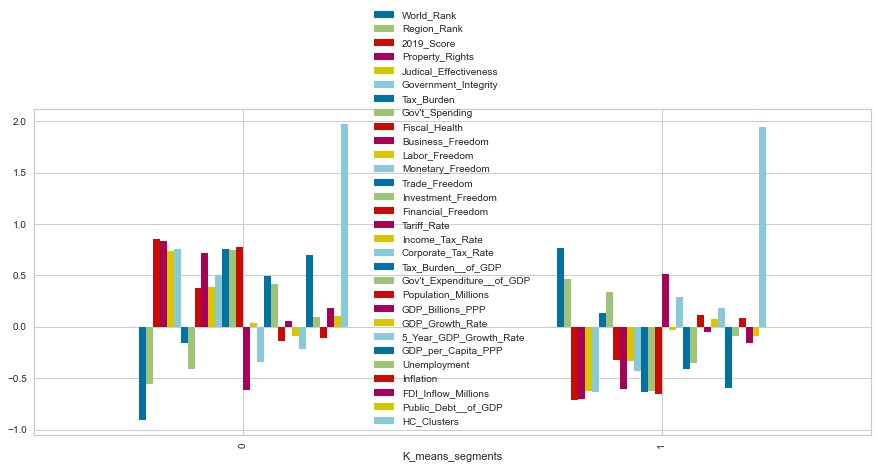

<IPython.core.display.Javascript object>

In [159]:
k_means_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

<AxesSubplot:xlabel='HC_segments'>

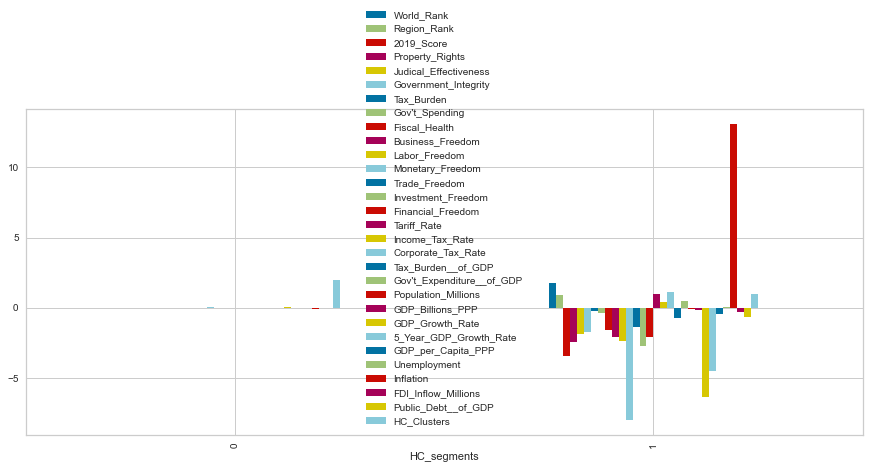

<IPython.core.display.Javascript object>

In [160]:
hc_df.groupby("HC_segments").mean().plot.bar(figsize=(15, 6))

### Let's create some plots on the original data to understand the distribution among the clusters

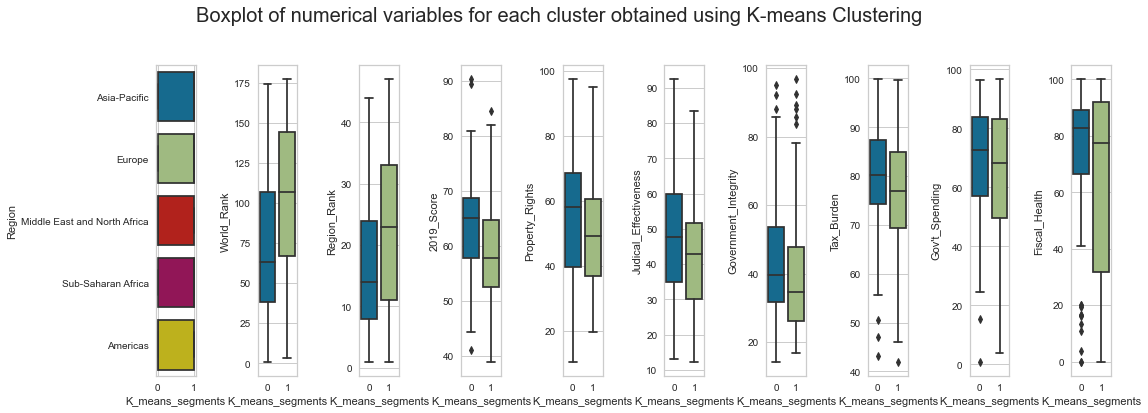

<IPython.core.display.Javascript object>

In [161]:
fig, axes = plt.subplots(1, 10, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using K-means Clustering",
    fontsize=20,
)

counter = 0

for ii in range(10):
    sns.boxplot(
        ax=axes[ii], y=df1[df1.columns[counter]], x=k_means_df["K_means_segments"]
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

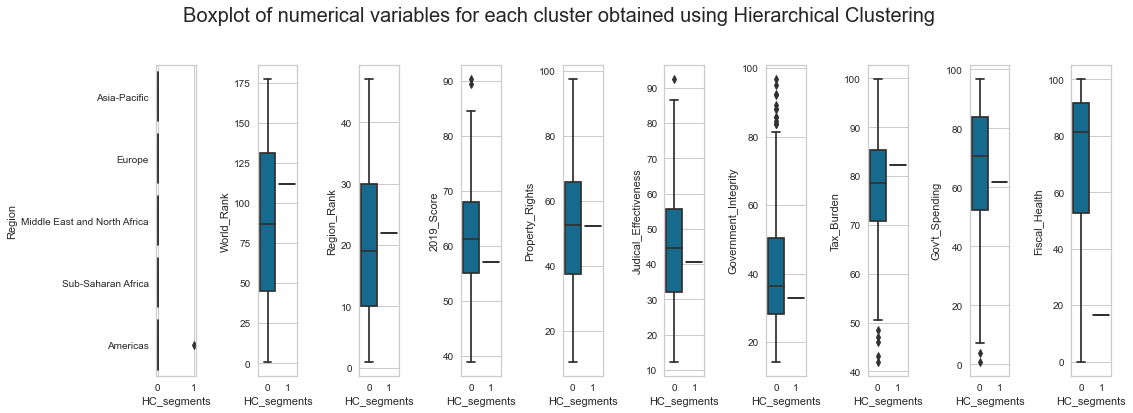

<IPython.core.display.Javascript object>

In [162]:
fig, axes = plt.subplots(1, 10, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using Hierarchical Clustering",
    fontsize=20,
)

counter = 0

for ii in range(10):
    sns.boxplot(ax=axes[ii], y=df2[df2.columns[counter]], x=hc_df["HC_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

## Cluster Comparison
### Cluster 0
* World_Rank and Region_Rank are higher in this cluster
* Property_Rights and 2019_Score are lower in this cluster

### Cluster 1
* Cluster 1 (range is not visible)
* Fiscal_Health and Govt_Spending are shown higher in HC cluster
* We should have treated outliers 

## Cluster Overlapping

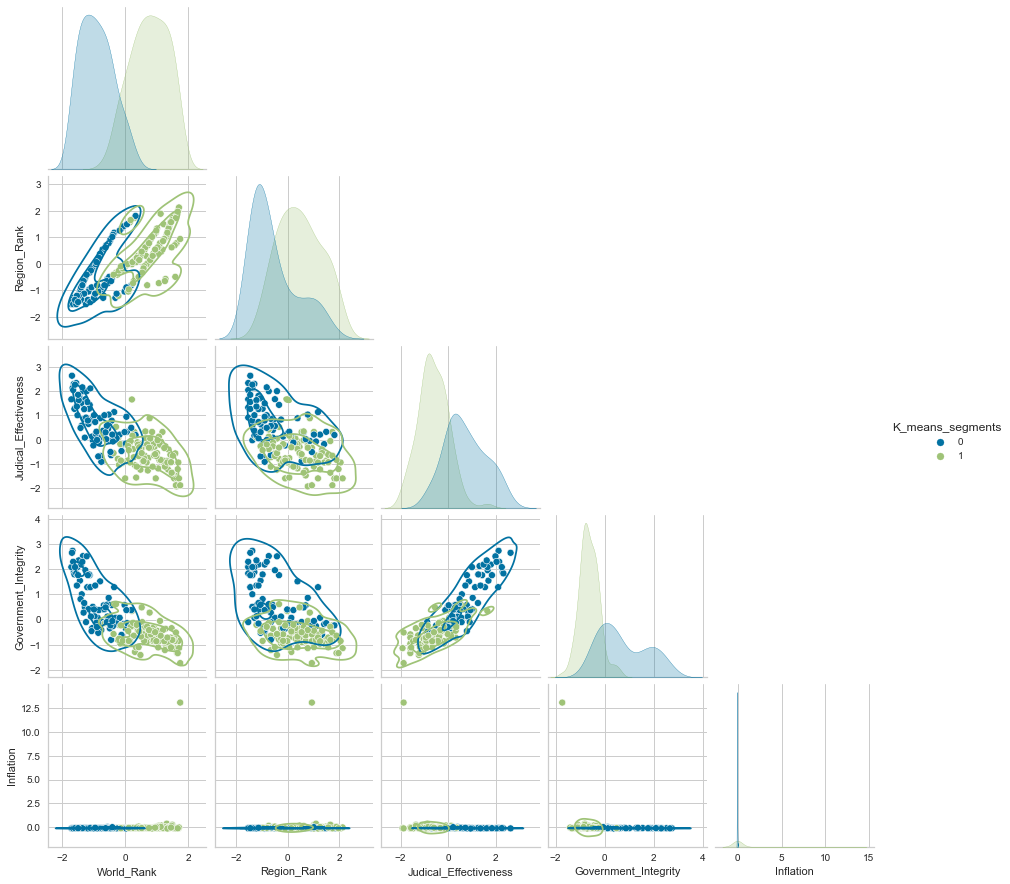

<IPython.core.display.Javascript object>

In [163]:
# let's see if there is any overlap in the clusters
g = sns.pairplot(
    k_means_df[
        [
            "World_Rank",
            "Region_Rank",
            "Judical_Effectiveness",
            "Government_Integrity",
            "Inflation",
            "K_means_segments",
        ]
    ],
    diag_kind="kde",
    corner=True,
    hue="K_means_segments",
)
g.map_lower(sns.kdeplot, levels=3, color=".2")
plt.show()

## PCA for Visualization

In [164]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(subset_scaled_df)

# storing results in a dataframe
reduced_data_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

# checking the amount of variance explained
print(
    f"The first two principal components explain {np.round(100*pca.explained_variance_ratio_.sum(), 2)}% of the variance in the data."
)

The first two principal components explain 46.51% of the variance in the data.


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

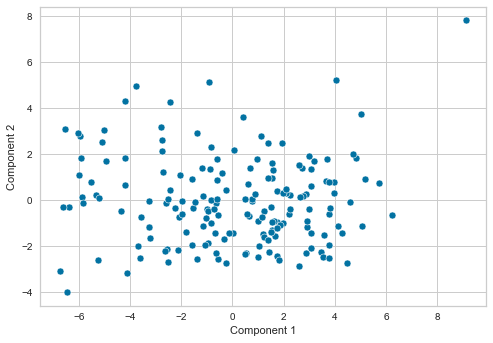

<IPython.core.display.Javascript object>

In [165]:
sns.scatterplot(data=reduced_data_df_pca, x="Component 1", y="Component 2")

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

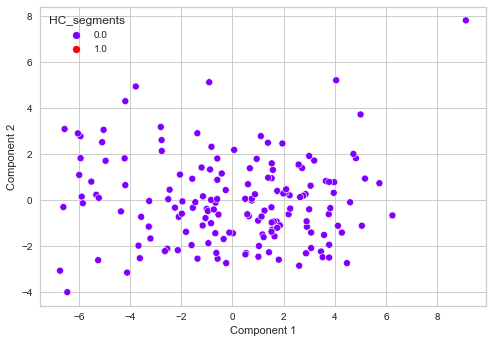

<IPython.core.display.Javascript object>

In [166]:
sns.scatterplot(
    data=reduced_data_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df2["HC_segments"],
    palette="rainbow",
)

### HC Clusters doesn't seem to be separated well